<a href="https://colab.research.google.com/github/dcolinmorgan/LTCOPDsex/blob/master/2xCOPD_gender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# !pip install s3fs
import os,time
# import s3fs
import pandas as pd
import numpy as np
from psutil import *
import matplotlib.pyplot as plt
import gc
import random
from scipy import stats
import seaborn as sns
from IPython.display import Image
from scipy.stats import zscore
timestr = time.strftime("%Y%m%d")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# data=np.load('/content/drive/MyDrive/LARGE_PANDA/LTRCcase.npy')
# plt.hist(data.flatten())

In [ ]:
# !git clone https://github.com/netZoo/netZooPy.git
!git clone --single-branch --branch devel https://github.com/netZoo/netZooPy.git
os.chdir('netZooPy')
!pip install -e ./

In [ ]:
import netZooPy
from netZooPy.panda import Panda
from netZooPy.lioness import Lioness
# from netZooPy import condor
# os.chdir('..')

In [ ]:
!pip install GEOparse
# !pip install pycombat

In [ ]:
import GEOparse
gse = GEOparse.get_GEO(geo="GSE76925", destdir="./")

In [ ]:
ww=pd.unique(gse.gpls['GPL10558'].table['Chromosome'])

In [ ]:
# data1=pd.read_csv('drive/My Drive/Colab Notebooks/GSE76925.txt',sep='\t',index_col=0)

In [ ]:
# largeCOPD=pd.read_csv('drive/My Drive/Colab Notebooks/LARGE_COPD_crossLTCOPD.txt',sep='\t',index_col=0)

###this data is same as clean expression per Jarrett

(array([ 49562., 383964., 543655., 376433., 258462., 209012., 191210.,
        187397., 187620., 194343., 203225., 212293., 217659., 214960.,
        198194., 171715., 144220., 114421.,  85028.,  60959.,  41408.,
         31360.,  22740.,  17207.,  13377.,   7051.]),
 array([ 1.99184613,  2.49559272,  2.99933931,  3.5030859 ,  4.00683249,
         4.51057908,  5.01432566,  5.51807225,  6.02181884,  6.52556543,
         7.02931202,  7.53305861,  8.0368052 ,  8.54055178,  9.04429837,
         9.54804496, 10.05179155, 10.55553814, 11.05928473, 11.56303131,
        12.0667779 , 12.57052449, 13.07427108, 13.57801767, 14.08176426,
        14.58551085, 15.08925743]),
 <a list of 26 Patch objects>)

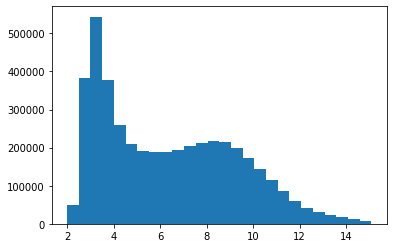

In [ ]:
del data1['loc']
plot=pd.melt(data1)['value']
# plot=np.array(plot.astype(float))
plt.hist(plot,bins=26)

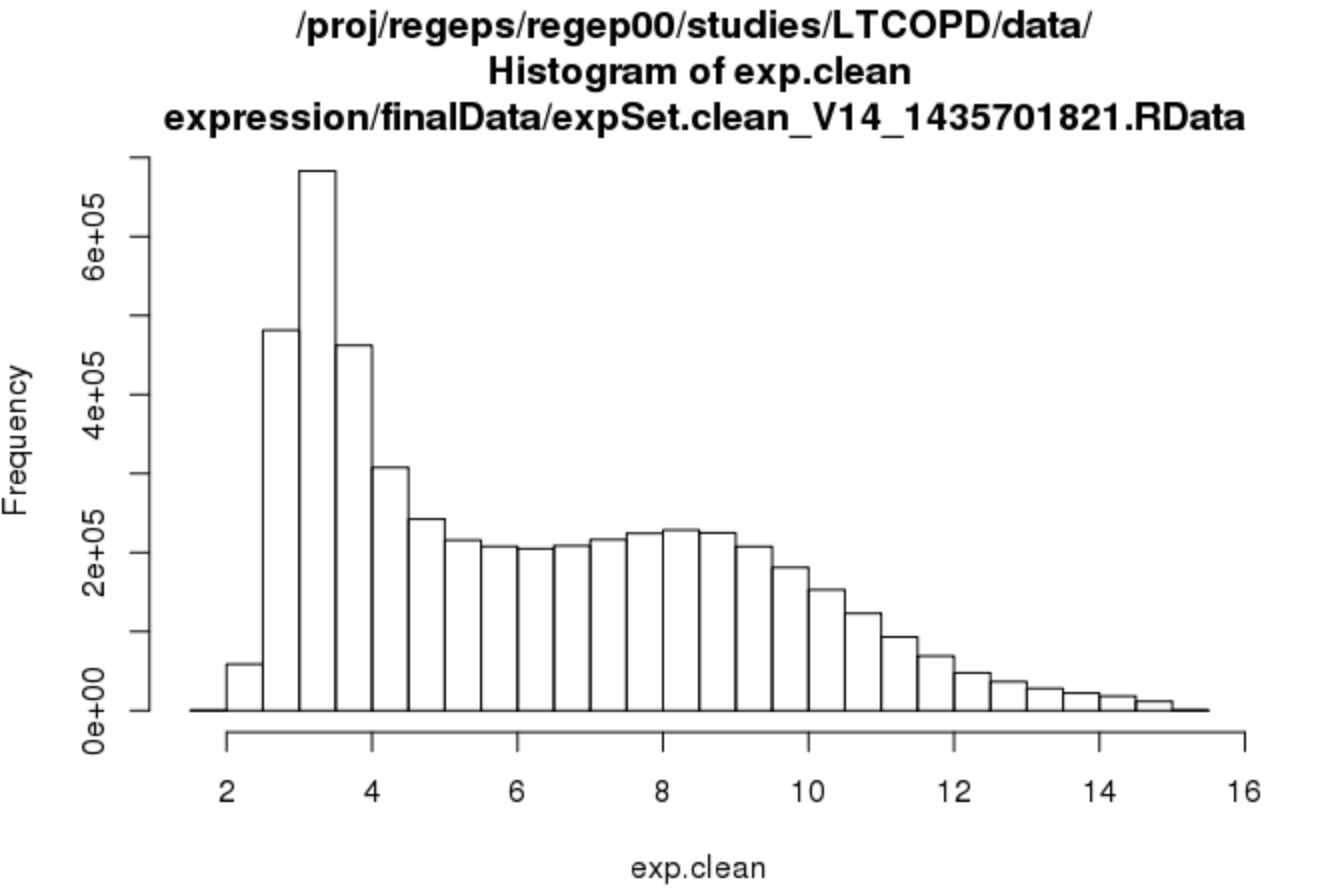

In [ ]:
Image(filename='drive/My Drive/Colab Notebooks/clean_LTCOPD.png',width=500)

In [ ]:
plt.rcParams.update(plt.rcParamsDefault)
cc=plt.hist(np.log(data1.values.flatten()),bins=100)

##test merged lung tissue datasets in PCA and heirarchical clustering

Text(0.5, 1.0, 'PCA of LT-RC datasets')

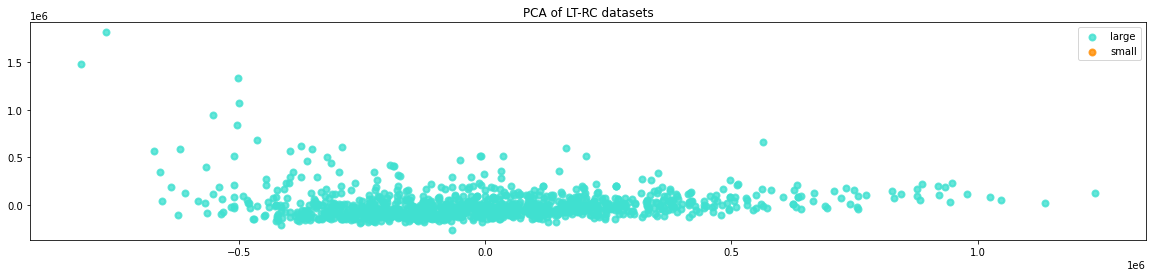

In [ ]:
X=largeCOPD#.merge(data1,left_index=True, right_index=True)
X=X.T
y=(pd.DataFrame(np.zeros(largeCOPD.shape[1]))).astype('int').to_numpy().flatten()
# from sklearn.cluster import AgglomerativeClustering
X.fillna(0, inplace=True)
# model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
from sklearn.decomposition import PCA
lw = 2
pca = PCA(n_components=lw)
X_r=pca.fit(X).transform(X)
# model = model.fit(data1)
from sklearn import datasets
iris = datasets.load_iris()
target_names = ['large','small']#iris.target_names

plt.figure(figsize=(20, 4))

colors = ['turquoise', 'darkorange']


for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of LT-RC datasets')

Text(0.5, 1.0, 'PCA of LT-RC datasets')

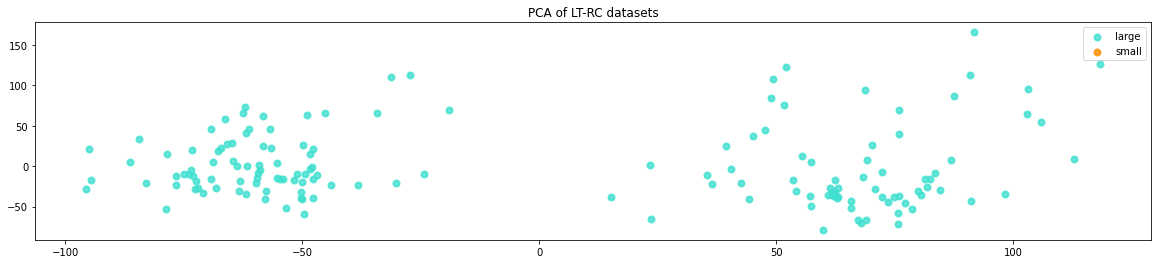

In [ ]:
X=data1#,left_index=True, right_index=True)
X=X.T
y=(pd.DataFrame(np.zeros(data1.shape[1]))).astype('int').to_numpy().flatten()
# from sklearn.cluster import AgglomerativeClustering
X.fillna(0, inplace=True)
# model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
from sklearn.decomposition import PCA
lw = 2
pca = PCA(n_components=lw)
X_r=pca.fit(X).transform(X)
# model = model.fit(data1)
from sklearn import datasets
iris = datasets.load_iris()
target_names = ['large','small']#iris.target_names

plt.figure(figsize=(20, 4))

colors = ['turquoise', 'darkorange']


for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of LT-RC datasets')

Text(0.5, 1.0, 'PCA of LT-RC and LT-COPD datasets')

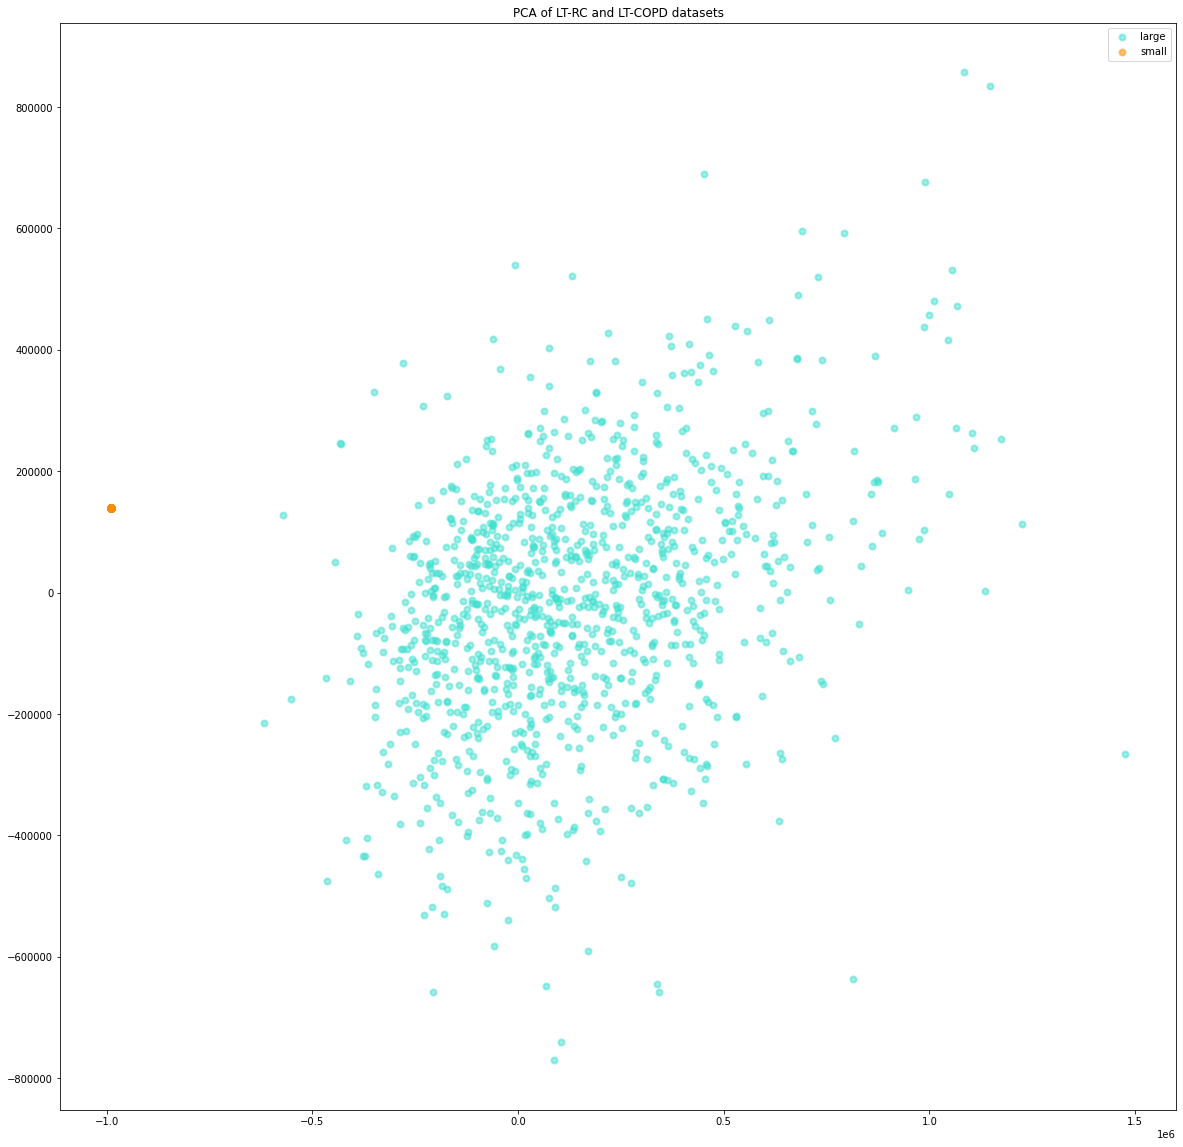

In [ ]:
X=largeCOPD.merge(data1,left_index=True, right_index=True)
X=X.T
y=(pd.DataFrame(np.zeros(largeCOPD.shape[1])).append(pd.DataFrame(np.ones(data1.shape[1])))).astype('int').to_numpy().flatten()
# from sklearn.cluster import AgglomerativeClustering
X.fillna(0, inplace=True)
# model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
from sklearn.decomposition import PCA
lw = 2
pca = PCA(n_components=lw)
X_r=pca.fit(X).transform(X)
# model = model.fit(data1)
from sklearn import datasets
iris = datasets.load_iris()
target_names = ['large','small']#iris.target_names

plt.figure(figsize=(20, 20))

colors = ['turquoise', 'darkorange']


for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.5, lw=lw,
                label=target_name, )
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of LT-RC and LT-COPD datasets')

In [ ]:
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


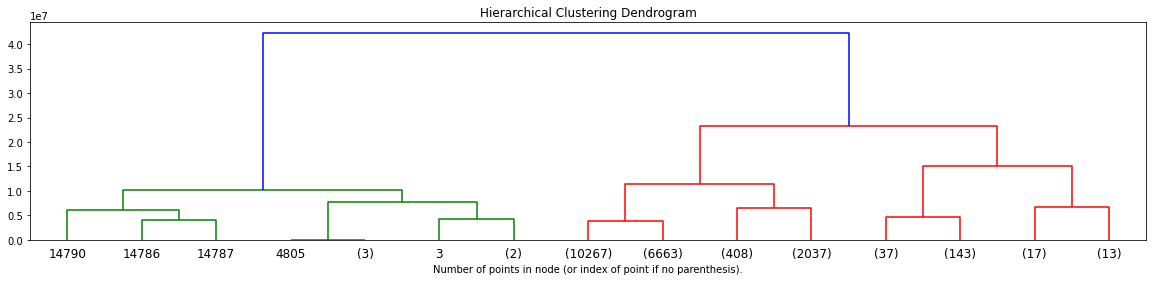

In [ ]:
plt.figure(figsize=(20, 4))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3,)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
plt.xkcd();
from scipy import stats, spatial, cluster
Z = cluster.hierarchy.linkage(cc, "complete")

In [ ]:
plt.style.use('classic')
plt.figure(figsize=(70, 4))
plt.title("Here's a dendrogram of our hierarchical clustering")
cluster.hierarchy.dendrogram(Z);

#create and run PANDA

In [ ]:
gse.pivot_samples


{'GPL10558': <d: GPL10558>}

In [ ]:
expression1 = gse.pivot_samples('VALUE')
gpl = gse.gpls[next(iter(gse.gpls))]
data = gse.pivot_samples(values="VALUE")#, gpl=gpl, annotation_column="Symbol")
pheno=gse.phenotype_data.rename(columns={'characteristics_ch1.0.age': 'age',"characteristics_ch1.1.Sex":"sex","characteristics_ch1.3.bmi":"bmi","characteristics_ch1.6.fev1.pp":"fev1","characteristics_ch1.4.packyears":"PY"})
pheno[['age',"sex","bmi","fev1","PY"]].to_csv('pheno_data.txt',sep='\t',index=True,header=True)

names=pd.DataFrame([gse.gpls['GPL10558'].table['ID'],gse.gpls['GPL10558'].table['ILMN_Gene']]).transpose()
data1=pd.merge(expression1,names,left_index=True,right_on='ID')

data1['loc']=gse.gpls['GPL10558'].table['Chromosome']

data1.index=data1['ILMN_Gene']
data1=data1.dropna(how='any')
del data1['ID'], data1['ILMN_Gene']

# data1.to_csv('drive/My Drive/Colab Notebooks/GSE76925.txt',sep='\t')

In [ ]:
jeff=(data1)
cc=jeff[jeff['loc']=='Y'].index

In [ ]:
ltrc_genes=pd.read_csv('drive/My Drive/Colab Notebooks/LTRC_genes_chr.txt',sep='\t')
data2=data1.merge(ltrc_genes,left_index=True,right_on='gene')

In [ ]:
pd.unique(data2.gene).shape

(14212,)

In [ ]:
cc=pd.unique(data2['gene'][data2['chr']=='chrY'].tolist())

In [ ]:
data2.index=data2.gene
data2=data2.groupby(data2.index).mean()
del data2['GSM2040941'],data2['GSM2040942'] ##remove rather than combat adjusting, only two samples from seperate batch
# combat.fit(Y=data2, b=b, X=X, C=C)

In [ ]:
pd.DataFrame(data2.index).to_csv('drive/My Drive/Colab Notebooks/LTCOPD_genes.txt',index=False,header=False,sep='\t')

In [ ]:
# data3=data1data1[data1['loc']!='Y']

# del data2['loc'], data2['ensg'], data2['gene'], data2['chr']

data2.columns=[gse.phenotype_data['characteristics_ch1.1.Sex'][:-2]+gse.phenotype_data['characteristics_ch1.5.copd'][:-2]]
data2.loc[:,'Fcase'].to_csv('Fcase.txt',sep='\t',index=True,header=False)
data2.loc[:,'Fcont'].to_csv('Fcont.txt',sep='\t',index=True,header=False)
print([data2.loc[:,'Fcase'].shape,data2.loc[:,'Fcont'].shape])

# data4=data1 #pd.DataFrame(np.copy(data1)) #data4[data4['loc']!='Y']
# del data4['loc']
# data2.columns=[gse.phenotype_data['characteristics_ch1.1.Sex']+gse.phenotype_data['characteristics_ch1.5.copd']]
data2.loc[:,'Mcase'].to_csv('Mcase.txt',sep='\t',index=True,header=False)
data2.loc[:,'Mcont'].to_csv('Mcont.txt',sep='\t',index=True,header=False)
print([data2.loc[:,'Mcase'].shape,data2.loc[:,'Mcont'].shape])

[(14212, 57), (14212, 25)]
[(14212, 52), (14212, 15)]


In [ ]:
# LCL_ppi=pd.read_csv('https://granddb.s3.amazonaws.com/optPANDA/ppi/ppi_complete.txt',sep='\t',header=None)
# LCL_ppi.to_csv('drive/My Drive/Colab Notebooks/ppi_complete.txt',sep='\t',index=False,header=False)

# coding_LCL_motif=pd.read_csv('https://granddb.s3.amazonaws.com/optPANDA/motifs/Hugo_motifCellLine.txt',sep='\t',header=None)
# coding_LCL_motif.to_csv('drive/My Drive/Colab Notebooks/coding_LCL_motif.txt',sep='\t',index=False,header=False)

motif_data='drive/My Drive/Colab Notebooks/coding_LCL_motif.txt'
ppi_data='drive/My Drive/Colab Notebooks/ppi_complete.txt'
F_motif_data='drive/My Drive/Colab Notebooks/F_coding_LCL_motif.txt'

In [ ]:
# coding_LCL_motif.columns=['TF','gene','W']
# aa=coding_LCL_motif[~coding_LCL_motif['TF'].isin(cc)]
# bb=coding_LCL_motif[coding_LCL_motif['TF'].isin(cc)]
# bb['W']=0
# F_coding_LCL_motif=aa.append(bb)

# aa=coding_LCL_motif[~coding_LCL_motif['gene'].isin(cc)]
# bb=coding_LCL_motif[coding_LCL_motif['gene'].isin(cc)]
# bb['W']=0
# F_coding_LCL_motif=aa.append(bb)
# coding_LCL_motif.to_csv('drive/My Drive/Colab Notebooks/F_coding_LCL_motif.txt',sep='\t',index=False,header=False)
# F_motif_data='drive/My Drive/Colab Notebooks/F_coding_LCL_motif.txt'

In [ ]:
panda_obj1 = Panda('Fcase.txt', F_motif_data, ppi_data,computing='gpu',precision='single',save_tmp=False,save_memory = False, remove_missing=False, keep_expression_matrix = False,modeProcess = 'intersection')
np.save('drive/My Drive/Colab Notebooks/model_output/Panda_F0case.npy',panda_obj1.export_panda_results)
del panda_obj1
panda_obj2 = Panda('Mcase.txt', motif_data, ppi_data,computing='gpu',precision='single',save_tmp=False,save_memory = False, remove_missing=False, keep_expression_matrix = False,modeProcess = 'intersection')
np.save('drive/My Drive/Colab Notebooks/model_output/Panda_Mcase.npy',panda_obj2.export_panda_results)
del panda_obj2
panda_obj3 = Panda('Fcont.txt', F_motif_data, ppi_data,computing='gpu',precision='single',save_tmp=False,save_memory = False, remove_missing=False, keep_expression_matrix = False,modeProcess = 'intersection')
np.save('drive/My Drive/Colab Notebooks/model_output/Panda_F0cont.npy',panda_obj3.export_panda_results)
del panda_obj3
panda_obj4 = Panda('Mcont.txt', motif_data, ppi_data,computing='gpu',precision='single',save_tmp=False,save_memory = False, remove_missing=False, keep_expression_matrix = False,modeProcess = 'intersection')
np.save('drive/My Drive/Colab Notebooks/model_output/Panda_Mcont.npy',panda_obj4.export_panda_results)
del panda_obj4
# panda_obj5 = Panda('FcaseFULL.txt', motif_data, ppi_data,computing='gpu',precision='single',save_tmp=False,save_memory = False, remove_missing=False, keep_expression_matrix = True,modeProcess = 'intersection')
# np.save('drive/My Drive/Panda_FcaseFULL.npy',panda_obj5.export_panda_results)
# del panda_obj5
# panda_obj6 = Panda('FcontFULL.txt', motif_data, ppi_data,computing='gpu',precision='single',save_tmp=False,save_memory = False, remove_missing=False, keep_expression_matrix = True,modeProcess = 'intersection')
# np.save('drive/My Drive/Panda_FcontFULL.npy',panda_obj6.export_panda_results)
# del panda_obj6


##Load Panda nets

In [ ]:
# Panda_Fcase=np.load('drive/My Drive/Colab Notebooks dcm/Panda_Fcase.npy',allow_pickle=True)#,sep='\t',index_col=0,header=None,names=['loc','symbol'])
# Panda_Fcont=np.load('drive/My Drive/Colab Notebooks dcm/Panda_Fcont.npy',allow_pickle=True)#,sep='\t',index_col=0,header=None,names=['loc','symbol'])
# Panda_Fcont=pd.DataFrame(Panda_Fcont)
# Panda_Fcont.columns=['tf','gene','motif','force']
# Panda_Fcase=pd.DataFrame(Panda_Fcase)
# Panda_Fcase.columns=['tf','gene','motif','force']

Panda_Mcase=np.load('drive/My Drive/Colab Notebooks/model_output/Panda_Mcase.npy',allow_pickle=True)#,sep='\t',index_col=0,header=None,names=['loc','symbol'])
Panda_Mcont=np.load('drive/My Drive/Colab Notebooks/model_output/Panda_Mcont.npy',allow_pickle=True)#,sep='\t',index_col=0,header=None,names=['loc','symbol'])
Panda_Mcont=pd.DataFrame(Panda_Mcont)
Panda_Mcont.columns=['tf','gene','motif','force']
Panda_Mcase=pd.DataFrame(Panda_Mcase)
Panda_Mcase.columns=['tf','gene','motif','force']

Panda_FcaseFULL=np.load('drive/My Drive/Colab Notebooks/model_output/Panda_F0case.npy',allow_pickle=True)#,sep='\t',index_col=0,header=None,names=['loc','symbol'])
Panda_FcontFULL=np.load('drive/My Drive/Colab Notebooks/model_output/Panda_F0cont.npy',allow_pickle=True)#,sep='\t',index_col=0,header=None,names=['loc','symbol'])
Panda_FcontFULL=pd.DataFrame(Panda_FcontFULL)
Panda_FcontFULL.columns=['tf','gene','motif','force']
Panda_FcaseFULL=pd.DataFrame(Panda_FcaseFULL)
Panda_FcaseFULL.columns=['tf','gene','motif','force']


##TF and gene specific zscore diff F



In [ ]:
from scipy.stats import zscore
# Panda_nullA.panda_results = pd.DataFrame(Panda_nullA.export_panda_results, columns=['tf','gene','motif','force'])
subset_panda_results3 = Panda_FcontFULL.sort_values(by=['force'], ascending=False)
# subset_panda_results3['merge']=subset_panda_results3.tf+'-'+subset_panda_results3.gene

# Panda_nullB.panda_results = pd.DataFrame(Panda_nullB.export_panda_results, columns=['tf','gene','motif','force'])
subset_panda_results1 = Panda_FcaseFULL.sort_values(by=['force'], ascending=False)
# subset_panda_results1['merge']=subset_panda_results1.tf+'-'+subset_panda_results1.gene
del subset_panda_results3['motif'],subset_panda_results1['motif']
TFsum_3=subset_panda_results3.groupby(['tf']).agg({'force':sum})
TFsum_1=subset_panda_results1.groupby(['tf']).agg({'force':sum})
TFsum_1['force']=zscore(TFsum_1['force'])
TFsum_3['force']=zscore(TFsum_3['force']) ##reduces range from 1500 to 3

geneSum_3=subset_panda_results3.groupby(['gene']).agg({'force':sum})
geneSum_1=subset_panda_results1.groupby(['gene']).agg({'force':sum})
geneSum_3['force']=zscore(geneSum_3['force'])
geneSum_1['force']=zscore(geneSum_1['force'])

mmm=TFsum_3.merge(TFsum_1, left_on=['tf'], right_on=['tf'])
mmmm=geneSum_3.merge(geneSum_1, left_on=['gene'], right_on=['gene'])

del [[subset_panda_results3, subset_panda_results1,Panda_FcontFULL,Panda_FcaseFULL]]
gc.collect()
subset_panda_results3=pd.DataFrame()
subset_panda_results1=pd.DataFrame()
Panda_FcontFULL=pd.DataFrame()
Panda_FcontFULL=pd.DataFrame()


mmm['diff']=mmm.force_x-mmm.force_y
mmm = mmm.sort_values(by ='diff' )


mmmm['diff']=mmmm.force_x-mmmm.force_y
mmmm = mmmm.sort_values(by ='diff' )
mmm.to_csv('drive/My Drive/TF_zscore_F.txt',sep='\t')
mmmm.to_csv('drive/My Drive/gene_zscore_F.txt',sep='\t')

##TF and gene specific zscore diff M

In [ ]:
# Panda_nullA.panda_results = pd.DataFrame(Panda_nullA.export_panda_results, columns=['tf','gene','motif','force'])
subset_panda_results3 = Panda_Mcont.sort_values(by=['force'], ascending=False)
# subset_panda_results3['merge']=subset_panda_results3.tf+'-'+subset_panda_results3.gene

# Panda_nullB.panda_results = pd.DataFrame(Panda_nullB.export_panda_results, columns=['tf','gene','motif','force'])
subset_panda_results1 = Panda_Mcase.sort_values(by=['force'], ascending=False)
# subset_panda_results1['merge']=subset_panda_results1.tf+'-'+subset_panda_results1.gene
del subset_panda_results3['motif'],subset_panda_results1['motif']
TFsum_3=subset_panda_results3.groupby(['tf']).agg({'force':sum})
TFsum_1=subset_panda_results1.groupby(['tf']).agg({'force':sum})
TFsum_1['force']=zscore(TFsum_1['force'])
TFsum_3['force']=zscore(TFsum_3['force'])

geneSum_3=subset_panda_results3.groupby(['gene']).agg({'force':sum})
geneSum_1=subset_panda_results1.groupby(['gene']).agg({'force':sum})
geneSum_3['force']=zscore(geneSum_3['force'])
geneSum_1['force']=zscore(geneSum_1['force'])

nnn=TFsum_3.merge(TFsum_1, left_on=['tf'], right_on=['tf'])
nnnn=geneSum_3.merge(geneSum_1, left_on=['gene'], right_on=['gene'])

del [[subset_panda_results3, subset_panda_results1,Panda_Mcont,Panda_Mcase]]
gc.collect()
subset_panda_results3=pd.DataFrame()
subset_panda_results1=pd.DataFrame()
Panda_Mcont=pd.DataFrame()
Panda_Mcase=pd.DataFrame()

nnn['diff']=nnn.force_x-nnn.force_y
nnn = nnn.sort_values(by ='diff' )

nnnn['diff']=nnnn.force_x-nnnn.force_y
nnnn = nnnn.sort_values(by ='diff' )
nnn.to_csv('drive/My Drive/TF_zscore_M.txt',sep='\t')
nnnn.to_csv('drive/My Drive/gene_zscore_M.txt',sep='\t')

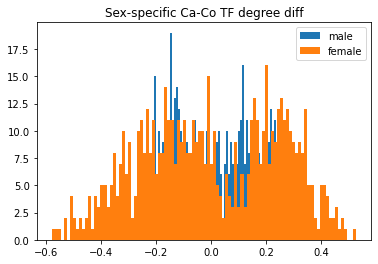

In [ ]:
sex_tf_diff=mmm.merge(nnn,on='tf')
a=plt.hist(sex_tf_diff['diff_x'],bins=100,label='male')
b=plt.hist(sex_tf_diff['diff_y'],bins=100,label='female')
plt.title('Sex-specific Ca-Co TF degree diff')
plt.legend(loc="best")

In [ ]:
[sex_tf_diff[(sex_tf_diff['diff_y'])>.4].index.values,sex_tf_diff[(sex_tf_diff['diff_y'])<-0.5].index.values] #,sex_tf_diff[np.abs(sex_tf_diff['diff_y'])>.4].tf]

[array(['MEF2A', 'ZFHX3', 'POU2F2', 'HOXD9', 'POU4F1', 'DMRTC2', 'HMG20B',
        'POU1F1', 'POU3F1', 'LHX3', 'NKX6-1', 'LIN54', 'MSX2', 'ZNF32',
        'MSX1', 'DMRT2', 'POU3F3', 'BARX1', 'LHX1', 'POU3F2', 'FOXD2',
        'FOXB1', 'TBPL2'], dtype=object),
 array(['KLF5', 'KLF15', 'KLF1', 'ZEB1', 'MAZ', 'ZNF281', 'ZNF263', 'PURA',
        'KLF4', 'SMAD1'], dtype=object)]

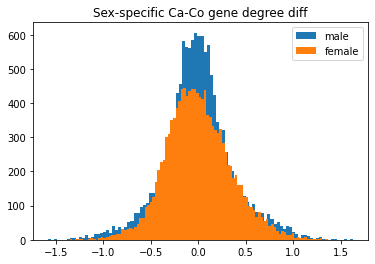

In [ ]:
sex_gene_diff=mmmm.merge(nnnn,on='gene')
a=plt.hist(sex_gene_diff['diff_x'],bins=100,label='male')
b=plt.hist(sex_gene_diff['diff_y'],bins=100,label='female')
plt.title('Sex-specific Ca-Co gene degree diff')
plt.legend(loc="best")

In [ ]:
[sex_gene_diff[(sex_gene_diff['diff_y'])>1].index.values,sex_gene_diff[(sex_gene_diff['diff_y'])<-1].index.values] #,sex_tf_diff[np.abs(sex_tf_diff['diff_y'])>.4].tf]

[array(['EFR3B', 'ULK4', 'SYT13', 'PDPN', 'SV2B', 'GRM5', 'RAVER2',
        'PTPRN2', 'ZBTB32', 'CPLX2', 'PCDHA1', 'SYN2', 'ADRB2', 'BBS12',
        'NR6A1', 'CAMP', 'TMEM9', 'CHRNB3', 'TNP1', 'MUL1', 'PSMG3',
        'TSPAN31', 'RPS19', 'TMEM159', 'BTBD9', 'ZNF706', 'CRIPT',
        'MRPS36', 'HIRIP3', 'SNAPIN', 'CHRNB4', 'TMEM18', 'BCDIN3D',
        'RNF121', 'CXCR1', 'COL9A3', 'CEACAM3', 'TCL6', 'RBP2', 'NAIF1',
        'FKBP1B', 'FETUB', 'LOH12CR2', 'SNIP1', 'TP53RK', 'CARD6', 'GZMM',
        'ARHGEF3', 'CCR9'], dtype=object),
 array(['SNORA6', 'HSD17B13', 'PLGLB1', 'FGD2', 'ZMAT3', 'BTAF1',
        'DNAJC5B', 'ATF4', 'HNRNPA2B1', 'FCRL4', 'KIF11', 'SNORA4',
        'ETFDH', 'GREM1', 'ACO2', 'CD4', 'NBPF10', 'OLAH', 'SNORD10',
        'BTN2A1', 'YBX1', 'SFXN3', 'SH2B3', 'CD74', 'CD37', 'CCR4', 'MED1',
        'TSTD2', 'NCF1B'], dtype=object)]

#Run larger COPD panda nets

In [ ]:
# LTRC_exp=pd.read_csv('drive/MyDrive/harvard/LARGE_COPD/LTRC_XXX_060521.txt',sep='\t',index_col=0)
# LTRC_exp_key=pd.read_csv('drive/MyDrive/harvard/LARGE_COPD/LTRC_XXXkey_060521.txt',sep='\t',index_col=0)
# data=np.multiply(LTRC_exp,LTRC_exp_key)
LTRC_exp=pd.read_csv('drive/MyDrive/harvard/LARGE_COPD/LTRC_qsmooth_combat.txt',sep='\t',index_col=0)
ltrc_genes=pd.read_csv('drive/My Drive/Colab Notebooks/LTRC_genes_chr.txt',sep='\t')
LTRC_exp.index=LTRC_exp.index.str.split('.').str[0].tolist()
data1=LTRC_exp.merge(ltrc_genes,left_index=True,right_on='ensg')
data1.index=data1['gene']
del data1['ensg'], data1['chr']
data1=data1.groupby(data1.index).mean()

In [ ]:
LTCOPD_genes=pd.read_csv('drive/My Drive/Colab Notebooks/LTCOPD_genes.txt',index_col=None,header=None,sep='\t')
data1=np.log2(data1.dropna(how='all'))
data1=data1.merge(LTCOPD_genes,left_index=True,right_on=0)
data1.index=data1[0]
data1.replace([np.inf, -np.inf], np.nan,inplace=True)
data1.replace(np.nan, 0,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log2
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log2
  


In [ ]:
del data1[0]
FC=data1.iloc[:,data1.columns.str.contains('_0_1')]
FNC=data1.iloc[:,data1.columns.str.contains('_0_0')]
MC=data1.iloc[:,data1.columns.str.contains('_1_1')]
MNC=data1.iloc[:,data1.columns.str.contains('_1_0')]
print([FC.shape,FNC.shape,MC.shape,MNC.shape])
FC.to_csv('drive/My Drive/harvard/LARGE_COPD/FC_exp.txt',sep='\t',index=True,header=False)
FNC.to_csv('drive/My Drive/harvard/LARGE_COPD/FNC_exp.txt',sep='\t',index=True,header=False)
MC.to_csv('drive/My Drive/harvard/LARGE_COPD/MC_exp.txt',sep='\t',index=True,header=False)
MNC.to_csv('drive/My Drive/harvard/LARGE_COPD/MNC_exp.txt',sep='\t',index=True,header=False)

[(14212, 176), (14212, 162), (14212, 201), (14212, 105)]


In [ ]:
# LCL_ppi=pd.read_csv('https://granddb.s3.amazonaws.com/optPANDA/ppi/ppi_complete.txt',sep='\t',header=None)
# LCL_ppi.to_csv('drive/My Drive/Colab Notebooks/ppi_complete.txt',sep='\t',index=False,header=False)

# coding_LCL_motif=pd.read_csv('https://granddb.s3.amazonaws.com/optPANDA/motifs/Hugo_motifCellLine.txt',sep='\t',header=None)
# coding_LCL_motif.to_csv('drive/My Drive/Colab Notebooks/coding_LCL_motif.txt',sep='\t',index=False,header=False)

# drive/My Drive/Colab Notebooks/coding_LCL_motif.txt
motif_data='drive/My Drive/Colab Notebooks/coding_LCL_motif.txt'
ppi_data='drive/My Drive/Colab Notebooks/ppi_complete.txt'
F_motif_data='drive/My Drive/Colab Notebooks/F_coding_LCL_motif.txt'

In [ ]:
panda_obj1 = Panda('drive/My Drive/harvard/LARGE_COPD/FC_exp.txt', F_motif_data, ppi_data,computing='gpu',precision='single',save_tmp=False,save_memory = False, remove_missing=False, keep_expression_matrix = False,modeProcess = 'intersection')
np.save('drive/My Drive/Colab Notebooks/model_output/FC_LTRC.npy',np.round(panda_obj1.export_panda_results,decimals=3))
del panda_obj1
panda_obj2 = Panda('drive/My Drive/harvard/LARGE_COPD/MC_exp.txt', motif_data, ppi_data,computing='gpu',precision='single',save_tmp=False,save_memory = False, remove_missing=False, keep_expression_matrix = False,modeProcess = 'intersection')
np.save('drive/My Drive/Colab Notebooks/model_output/MC_LTRC.npy',np.round(panda_obj2.export_panda_results,decimals=3))
del panda_obj2
panda_obj3 = Panda('drive/My Drive/harvard/LARGE_COPD/FNC_exp.txt', F_motif_data, ppi_data,computing='gpu',precision='single',save_tmp=False,save_memory = False, remove_missing=False, keep_expression_matrix = False,modeProcess = 'intersection')
np.save('drive/My Drive/Colab Notebooks/model_output/FNC_LTRC.npy',np.round(panda_obj3.export_panda_results,decimals=3))
del panda_obj3
panda_obj4 = Panda('drive/My Drive/harvard/LARGE_COPD/MNC_exp.txt', motif_data, ppi_data,computing='gpu',precision='single',save_tmp=False,save_memory = False, remove_missing=False, keep_expression_matrix = False,modeProcess = 'intersection')
np.save('drive/My Drive/Colab Notebooks/model_output/MNC_LTRC.npy',np.round(panda_obj4.export_panda_results,decimals=3))
del panda_obj4
# panda_obj5 = Panda('FcaseFULL.txt', motif_data, ppi_data,computing='gpu',precision='single',save_tmp=False,save_memory = False, remove_missing=False, keep_expression_matrix = True,modeProcess = 'intersection')
# np.save('drive/My Drive/Panda_FcaseFULL.npy',panda_obj5.export_panda_results)
# del panda_obj5
# panda_obj6 = Panda('FcontFULL.txt', motif_data, ppi_data,computing='gpu',precision='single',save_tmp=False,save_memory = False, remove_missing=False, keep_expression_matrix = True,modeProcess = 'intersection')
# np.save('drive/My Drive/Panda_FcontFULL.npy',panda_obj6.export_panda_results)
# del panda_obj6


##MALE

In [ ]:
from scipy.stats import zscore

In [ ]:
MC=np.load('drive/My Drive/Colab Notebooks/model_output/MC_LTRC.npy',allow_pickle=True)#,sep='\t',index_col=0,header=None,names=['loc','symbol'])
MNC=np.load('drive/My Drive/Colab Notebooks/model_output/MNC_LTRC.npy',allow_pickle=True)#,sep='\t',index_col=0,header=None,names=['loc','symbol'])
MNC=pd.DataFrame(MNC)
MNC.columns=['tf','gene','motif','force']
MC=pd.DataFrame(MC)
MC.columns=['tf','gene','motif','force']

In [ ]:
TFsum_3=MC.groupby(['tf']).agg({'force':sum})
TFsum_1=MNC.groupby(['tf']).agg({'force':sum})
TFsum_1['force']=zscore(TFsum_1['force'])
TFsum_3['force']=zscore(TFsum_3['force']) ##reduces range from 1500 to 3

geneSum_3=MC.groupby(['gene']).agg({'force':sum})
geneSum_1=MNC.groupby(['gene']).agg({'force':sum})
geneSum_3['force']=zscore(geneSum_3['force'])
geneSum_1['force']=zscore(geneSum_1['force'])

mmm=TFsum_3.merge(TFsum_1, left_on=['tf'], right_on=['tf'])
mmmm=geneSum_3.merge(geneSum_1, left_on=['gene'], right_on=['gene'])

# del [[MC, MNC]]
# gc.collect()
MC=pd.DataFrame()
MNC=pd.DataFrame()
# Panda_FcontFULL=pd.DataFrame()
# Panda_FcontFULL=pd.DataFrame()


mmm['diff']=mmm.force_x-mmm.force_y
mmm = mmm.sort_values(by ='diff' )


mmmm['diff']=mmmm.force_x-mmmm.force_y
mmmm = mmmm.sort_values(by ='diff' )
mmm.to_csv('drive/My Drive/TF_zscore_M_large.txt',sep='\t')
mmmm.to_csv('drive/My Drive/gene_zscore_M_large.txt',sep='\t')

##FEMALE

In [ ]:
FC=np.load('drive/My Drive/Colab Notebooks/model_output/FC_LTRC.npy',allow_pickle=True)#,sep='\t',index_col=0,header=None,names=['loc','symbol'])
FNC=np.load('drive/My Drive/Colab Notebooks/model_output/FNC_LTRC.npy',allow_pickle=True)#,sep='\t',index_col=0,header=None,names=['loc','symbol'])
FNC=pd.DataFrame(FNC)
FNC.columns=['tf','gene','motif','force']
FC=pd.DataFrame(FC)
FC.columns=['tf','gene','motif','force']

In [ ]:
TFsum_4=FC.groupby(['tf']).agg({'force':sum})
TFsum_2=FNC.groupby(['tf']).agg({'force':sum})
TFsum_2['force']=zscore(TFsum_2['force'])
TFsum_4['force']=zscore(TFsum_4['force']) ##reduces range from 2500 to 4

geneSum_4=FC.groupby(['gene']).agg({'force':sum})
geneSum_2=FNC.groupby(['gene']).agg({'force':sum})
geneSum_4['force']=zscore(geneSum_4['force'])
geneSum_2['force']=zscore(geneSum_2['force'])

nnn=TFsum_4.merge(TFsum_2, left_on=['tf'], right_on=['tf'])
nnnn=geneSum_4.merge(geneSum_2, left_on=['gene'], right_on=['gene'])

# del [[FC, FNC]]
# gc.collect()
FC=pd.DataFrame()
FNC=pd.DataFrame()
Panda_FcontFULL=pd.DataFrame()
Panda_FcontFULL=pd.DataFrame()


nnn['diff']=nnn.force_x-nnn.force_y
nnn = nnn.sort_values(by ='diff' )


nnnn['diff']=mmmm.force_x-nnnn.force_y
nnnn = nnnn.sort_values(by ='diff' )
nnn.to_csv('drive/My Drive/TF_zscore_F_large.txt',sep='\t')
nnnn.to_csv('drive/My Drive/gene_zscore_F_large.txt',sep='\t')

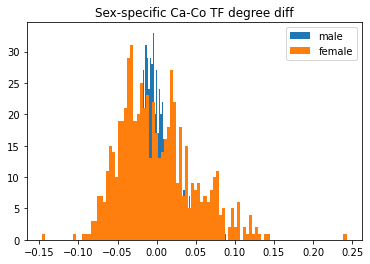

In [ ]:
sex_tf_diff=mmm.merge(nnn,on='tf')
a=plt.hist(sex_tf_diff['diff_x'],bins=100,label='male')
b=plt.hist(sex_tf_diff['diff_y'],bins=100,label='female')
plt.title('Sex-specific Ca-Co TF degree diff')
plt.legend(loc="best")

In [ ]:
[sex_tf_diff[(sex_tf_diff['diff_y'])>.15].index.values,sex_tf_diff[(sex_tf_diff['diff_y'])<-0.15].index.values] #,sex_tf_diff[np.abs(sex_tf_diff['diff_y'])>.4].tf]

[array(['YY1'], dtype=object), array([], dtype=object)]

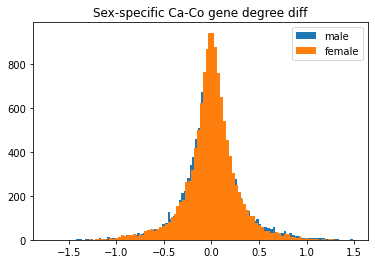

In [ ]:
sex_gene_diff=mmmm.merge(nnnn,on='gene')
a=plt.hist(sex_gene_diff['diff_x'],bins=100,label='male')
b=plt.hist(sex_gene_diff['diff_y'],bins=100,label='female')
plt.title('Sex-specific Ca-Co gene degree diff')
# plt.xlim(.1,-0.1)
plt.legend(loc="best")

In [ ]:
[sex_gene_diff[(sex_gene_diff['diff_y'])>1].index.values,sex_gene_diff[(sex_gene_diff['diff_y'])<-1].index.values] #,sex_tf_diff[np.abs(sex_tf_diff['diff_y'])>.4].tf]

[array(['RAB22A', 'NOS2', 'RNF34', 'CHST10', 'DNAJC16', 'SERF1A', 'ZNF583',
        'PSMC1', 'FXR2', 'TNK1', 'MLLT1', 'NTRK2', 'ERBB2', 'ZNF502',
        'GRK1'], dtype=object),
 array(['RAP2A', 'NOTCH2', 'SPATA5', 'ATP6V0D2', 'FAM8A1', 'ZYG11B',
        'H2AFV', 'ERP44', 'EIF3A', 'FOXJ2', 'MTPN', 'ZSWIM6', 'ACSM5',
        'GOLT1B', 'AK3', 'PPP1R3B', 'MS4A6A', 'GPX5', 'CLEC5A', 'SYS1',
        'GTF2A1', 'HTR2B', 'PRG4', 'GSG1', 'ANXA6', 'KIF26B', 'REEP3',
        'PNKD', 'MELK', 'CRH', 'MS4A4A', 'CTSB', 'FOXM1', 'IGSF6', 'ARL5B',
        'MPV17L2', 'CTSA', 'HABP2', 'CXCL16', 'MTHFD2', 'SLC16A6', 'WISP1',
        'ITGA11', 'CD3E', 'SNORA31', 'CA3', 'CHID1', 'RAD23A', 'COX6B1',
        'RGS20'], dtype=object)]

In [ ]:
ff=pd.read_csv('drive/My Drive/TF_zscore_F_large.txt',sep='\t',header=0)
fff=pd.read_csv('drive/My Drive/gene_zscore_F_large.txt',sep='\t',header=0)
mm=pd.read_csv('drive/My Drive/TF_zscore_M_large.txt',sep='\t',header=0)
mmm=pd.read_csv('drive/My Drive/gene_zscore_M_large.txt',sep='\t',header=0)
sex_tf_diff=ff.merge(mm,on='tf')

# a=plt.hist(sex_tf_diff['diff_x'],bins=100,label='female')
# b=plt.hist(sex_tf_diff['diff_y'],bins=100,label='male')
# plt.title('LTRC Sex-specific Ca-Co TF degree diff')
# plt.legend(loc="best")

# [sex_tf_diff[(sex_tf_diff['diff_y'])>.1].TF.values,sex_tf_diff[(sex_tf_diff['diff_y'])<-0.1].TF.values] #,sex_tf_diff[np.abs(sex_tf_diff['diff_y'])>.4].tf]

sex_tf_diff.columns=['TF','F_case','F_cont','Fdiff','M_case','M_cont','Mdiff']
sex_tf_diff.to_csv('drive/My Drive/TF_sex_diff.txt',sep='\t',index=0)


sex_gene_diff=fff.merge(mmm,on='gene')
sex_gene_diff.columns=['gene','F_case','F_cont','Fdiff','M_case','M_cont','Mdiff']
sex_gene_diff.to_csv('drive/My Drive/gene_sex_diff.txt',sep='\t',index=0)


##Compare All

In [3]:
ff=pd.read_csv('drive/My Drive/TF_zscore_F.txt',sep='\t',header=0)
fff=pd.read_csv('drive/My Drive/gene_zscore_F.txt',sep='\t',header=0)
mm=pd.read_csv('drive/My Drive/TF_zscore_M.txt',sep='\t',header=0)
mmm=pd.read_csv('drive/My Drive/gene_zscore_M.txt',sep='\t',header=0)

sex_tf_diffB=ff.merge(mm,on='tf')
sex_tf_diffB.columns=['TF','F_case','F_cont','Fdiff','M_case','M_cont','Mdiff']
# sex_tf_diffB.to_csv('drive/My Drive/TF_sex_diff.txt',sep='\t',index=0)


sex_gene_diffB=fff.merge(mmm,on='gene')
sex_gene_diffB.columns=['gene','F_case','F_cont','Fdiff','M_case','M_cont','Mdiff']
# sex_gene_diffB.to_csv('drive/My Drive/gene_sex_diff.txt',sep='\t',index=0)

In [4]:
ff=pd.read_csv('drive/My Drive/TF_zscore_F_large.txt',sep='\t',header=0)
fff=pd.read_csv('drive/My Drive/gene_zscore_F_large.txt',sep='\t',header=0)
mm=pd.read_csv('drive/My Drive/TF_zscore_M_large.txt',sep='\t',header=0)
mmm=pd.read_csv('drive/My Drive/gene_zscore_M_large.txt',sep='\t',header=0)

sex_tf_diffA=ff.merge(mm,on='tf')
sex_tf_diffA.columns=['TF','F_case','F_cont','Fdiff','M_case','M_cont','Mdiff']
# sex_tf_diffA.to_csv('drive/My Drive/TF_sex_diff.txt',sep='\t',index=0)


sex_gene_diffA=fff.merge(mmm,on='gene')
sex_gene_diffA.columns=['gene','F_case','F_cont','Fdiff','M_case','M_cont','Mdiff']
# sex_gene_diffA.to_csv('drive/My Drive/gene_sex_diff.txt',sep='\t',index=0)

In [5]:
sex_tf_diffA=sex_tf_diffA.sort_values('TF')
sex_tf_diffB=sex_tf_diffB.sort_values('TF')
sex_gene_diffA=sex_gene_diffA.sort_values('gene')
sex_gene_diffB=sex_gene_diffB.sort_values('gene')

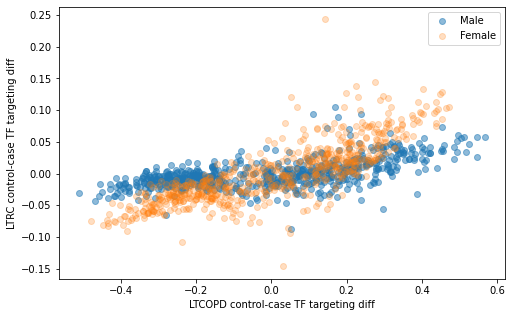

In [155]:
plt.figure(figsize=(8, 5))
# p1=plt.bar(sex_tf_diffB.index,sex_tf_diffB['Mdiff'])
# p2=plt.bar(sex_tf_diffA.index,sex_tf_diffA['Mdiff'],bottom=sex_tf_diffB['Mdiff']) 
# p3=plt.bar(sex_tf_diffB.index,sex_tf_diffB['Fdiff'])
# p4=plt.bar(sex_tf_diffA.index,sex_tf_diffA['Fdiff'],bottom=sex_tf_diffB['Fdiff'])
# plt.legend((p1[0], p2[0],p3[0],p4[0]), ('smallMen', 'largeMen','smallWomen','largeWomen'))

p1=plt.scatter(sex_tf_diffB['Mdiff'],sex_tf_diffA['Mdiff'],alpha=.5) ## minus because one is case-control, other control-case!!
p2=plt.scatter(sex_tf_diffB['Fdiff'],sex_tf_diffA['Fdiff'],alpha=.25)
plt.ylabel('LTRC control-case TF targeting diff')
plt.xlabel('LTCOPD control-case TF targeting diff')
plt.legend((p1, p2),('Male','Female'))
plt.savefig("fig.png",dpi=300,bbox_inches = "tight")


In [7]:
# from scipy.stats import spearmanr
# from scipy.stats import zscore

In [8]:
rhoM, pvalM = np.corrcoef(sex_tf_diffB['Mdiff'], sex_tf_diffA['Mdiff'])
# pvalM
rhoF, pvalF = np.corrcoef(sex_tf_diffB['Fdiff'], sex_tf_diffA['Fdiff'])
# pvalF
print([rhoM[1],rhoF[1]])

rhoM, pvalM = stats.spearmanr(sex_tf_diffB['Mdiff'], sex_tf_diffA['Mdiff'])
# pvalM
rhoF, pvalF = stats.spearmanr(sex_tf_diffB['Fdiff'], sex_tf_diffA['Fdiff'])
# pvalF
print([rhoM,rhoF])

[0.5948599398533795, 0.80788125486172]
[0.6043758266480426, 0.8424158985103016]


In [138]:
jeff=pd.DataFrame([sex_tf_diffA.sort_values(by='Fdiff')['TF'].values[0:25],
sex_tf_diffA.sort_values(by='Fdiff')['TF'].values[611:636],
sex_tf_diffA.sort_values(by='Mdiff')['TF'].values[0:25],
sex_tf_diffA.sort_values(by='Mdiff')['TF'].values[611:636],
sex_tf_diffB.sort_values(by='Fdiff')['TF'].values[0:25],
sex_tf_diffB.sort_values(by='Fdiff')['TF'].values[611:636],
sex_tf_diffB.sort_values(by='Mdiff')['TF'].values[0:25],
sex_tf_diffB.sort_values(by='Mdiff')['TF'].values[611:636]])

jeff.T

,0,1,2,3,4,5,6,7
0,TERF2,TCF3,MYBL2,RXRA,TBPL2,NR2C1,TBPL2,TFAP4
1,ARID3A,REST,ARID3A,TCF3,BARX1,KLF2,HMG20B,SP4
2,TP63,ZNF148,GABPA,PATZ1,FOXD2,TWIST1,POU3F3,KLF2
3,DMRTC2,ESRRB,OSR1,KLF15,LHX1,SP3,BARX1,KLF3
4,MYBL2,KLF15,YY1,EPAS1,POU3F3,SP8,DMRTC2,MYOG
5,POU3F3,MAZ,HMG20B,ZBTB18,FOXB1,PLAG1,DMRT2,REST
6,BARX1,MXI1,ONECUT2,MAFA,POU3F2,ZBTB7B,FOXB1,KLF16
7,HMG20B,ZFX,ELK4,MZF1,MSX1,SMAD1,POU3F1,SP1
8,LHX1,MYOG,GSC,TCF12,MSX2,KLF16,FOXD2,NEUROD1
9,ATF4,NR1I3,FOXP1,SMAD1,DMRT2,REST,LHX1,RREB1


In [139]:
jeff=[set(sex_tf_diffA.sort_values(by='Fdiff')['TF'].values[0:25]),
set(sex_tf_diffA.sort_values(by='Fdiff')['TF'].values[611:636]),
set(sex_tf_diffA.sort_values(by='Mdiff')['TF'].values[0:25]),
set(sex_tf_diffA.sort_values(by='Mdiff')['TF'].values[611:636]),
set(sex_tf_diffB.sort_values(by='Fdiff')['TF'].values[0:25]),
set(sex_tf_diffB.sort_values(by='Fdiff')['TF'].values[611:636]),
set(sex_tf_diffB.sort_values(by='Mdiff')['TF'].values[0:25]),
set(sex_tf_diffB.sort_values(by='Mdiff')['TF'].values[611:636])]

https://github.com/gecko984/supervenn:
> The numbers at the bottom show the sizes (cardinalities) of all intersections, which we will call chunks. The sizes of sets and their intersections (chunks) are up to proportion, but the order of elements is not preserved


In [5]:
!pip install supervenn
from supervenn import supervenn

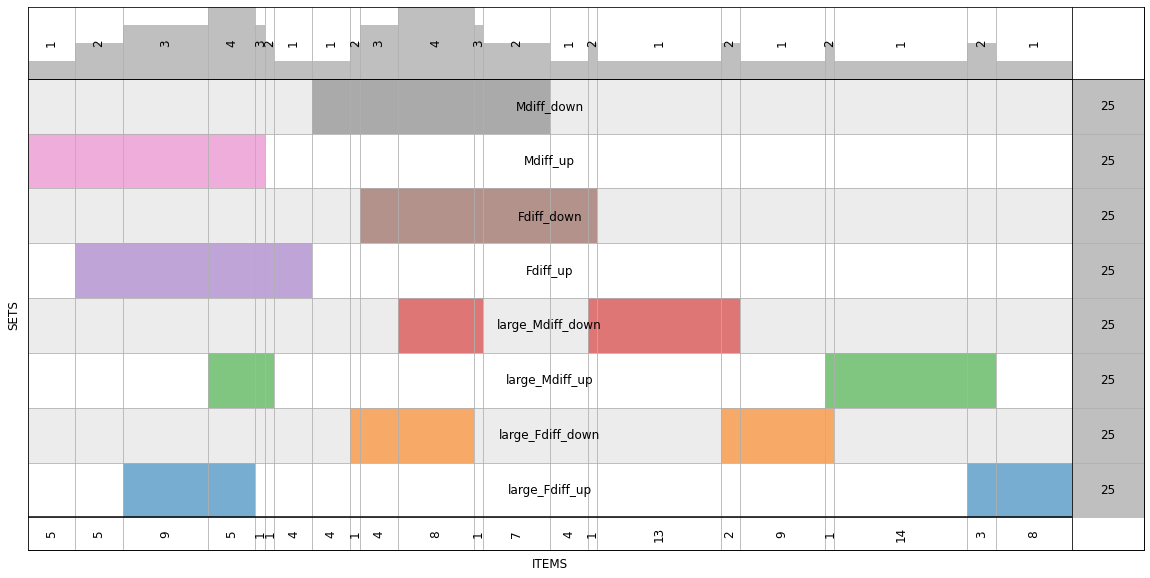

In [111]:
plt.figure(figsize=(20, 10))
species_names=['large_Fdiff_up','large_Fdiff_down','large_Mdiff_up','large_Mdiff_down',
      'Fdiff_up','Fdiff_down','Mdiff_up','Mdiff_down']

supervenn(jeff, species_names, rotate_col_annotations=True)#,
          # col_annotations_area_height=1.2, sets_ordering='minimize gaps',
          # min_width_for_annotation=180)

In [127]:
bb=pd.merge(sex_gene_diffB,sex_gene_diffA,on='gene')
# sex_gene_diffB

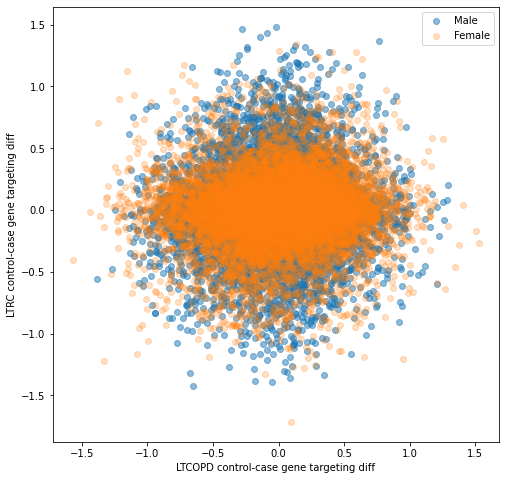

In [156]:
plt.figure(figsize=(8, 8))

p1=plt.scatter(bb['Mdiff_x'],bb['Mdiff_y'],alpha=.5)
p2=plt.scatter(bb['Fdiff_x'],bb['Fdiff_y'],alpha=.25)
plt.ylabel('LTRC control-case gene targeting diff')
plt.xlabel('LTCOPD control-case gene targeting diff')
plt.legend((p1, p2),('Male','Female'))

In [132]:
rhoM, pvalM = np.corrcoef(bb['Mdiff_x'], bb['Mdiff_y'])
# pvalM
rhoF, pvalF = np.corrcoef(bb['Fdiff_x'], bb['Fdiff_y'])
# pvalF
print([rhoM[1],rhoF[1]])

rhoM, pvalM = stats.spearmanr(bb['Mdiff_x'], bb['Mdiff_y'])
# pvalM
rhoF, pvalF = stats.spearmanr(bb['Fdiff_x'], bb['Fdiff_y'])
# pvalF
print([rhoM,rhoF])

[0.007808176585638869, 0.04905435038783811]
[-0.010250034147831825, 0.06279297821876287]


In [145]:
jeff=pd.DataFrame([sex_gene_diffA.sort_values(by='Fdiff')['gene'].values[0:100],
sex_gene_diffA.sort_values(by='Fdiff')['gene'].values[(len(sex_gene_diffA.Fdiff)-100):len(sex_gene_diffA.Fdiff)],
sex_gene_diffA.sort_values(by='Mdiff')['gene'].values[0:100],
sex_gene_diffA.sort_values(by='Mdiff')['gene'].values[(len(sex_gene_diffA.Mdiff)-100):len(sex_gene_diffA.Mdiff)],
sex_gene_diffB.sort_values(by='Fdiff')['gene'].values[0:100],
sex_gene_diffB.sort_values(by='Fdiff')['gene'].values[(len(sex_gene_diffB.Fdiff)-100):len(sex_gene_diffB.Fdiff)],
sex_gene_diffB.sort_values(by='Mdiff')['gene'].values[0:100],
sex_gene_diffB.sort_values(by='Mdiff')['gene'].values[(len(sex_gene_diffB.Mdiff)-100):len(sex_gene_diffB.Mdiff)]])

jeff=jeff.T


In [ ]:

pp=jeff[1].tolist()

print(*pp, sep='\n')

In [123]:
jeff2=[set(sex_gene_diffA.sort_values(by='Fdiff')['gene'].values[0:100]),
set(sex_gene_diffA.sort_values(by='Fdiff')['gene'].values[(len(sex_gene_diffA.Fdiff)-100):len(sex_gene_diffA.Fdiff)]),
set(sex_gene_diffA.sort_values(by='Mdiff')['gene'].values[0:100]),
set(sex_gene_diffA.sort_values(by='Mdiff')['gene'].values[(len(sex_gene_diffA.Mdiff)-100):len(sex_gene_diffA.Mdiff)]),
set(sex_gene_diffB.sort_values(by='Fdiff')['gene'].values[0:100]),
set(sex_gene_diffB.sort_values(by='Fdiff')['gene'].values[(len(sex_gene_diffB.Fdiff)-100):len(sex_gene_diffB.Fdiff)]),
set(sex_gene_diffB.sort_values(by='Mdiff')['gene'].values[0:100]),
set(sex_gene_diffB.sort_values(by='Mdiff')['gene'].values[(len(sex_gene_diffB.Mdiff)-100):len(sex_gene_diffB.Mdiff)])]

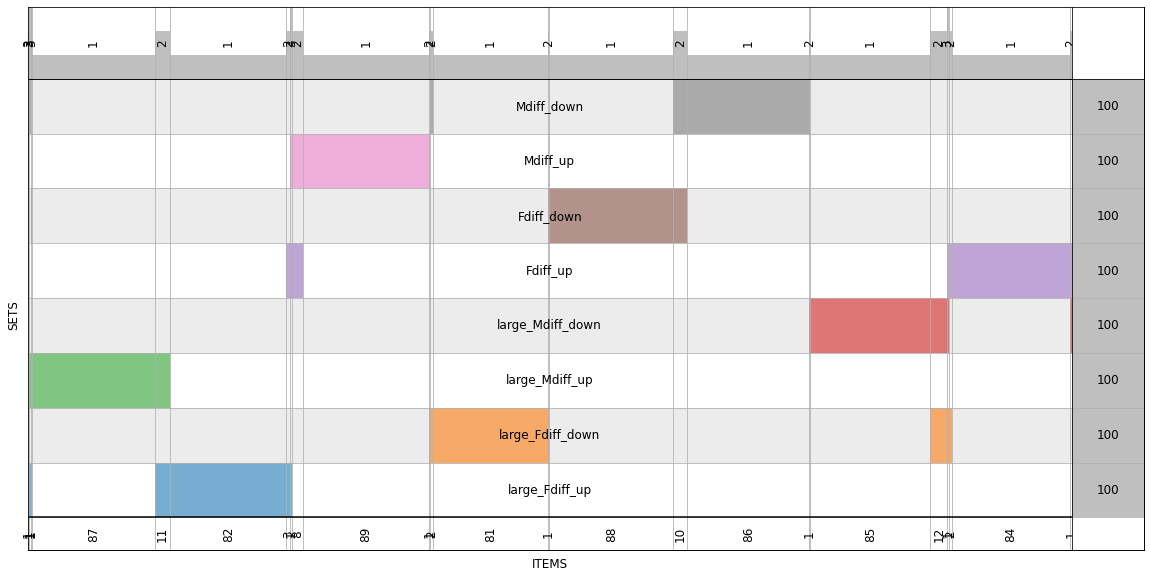

In [124]:
plt.figure(figsize=(20, 10))
species_names=['large_Fdiff_up','large_Fdiff_down','large_Mdiff_up','large_Mdiff_down',
      'Fdiff_up','Fdiff_down','Mdiff_up','Mdiff_down']

supervenn(jeff2, species_names, rotate_col_annotations=True)#,
          # col_annotations_area_height=1.2, sets_ordering='minimize gaps',
          # min_width_for_annotation=180)

####load and compare Clue-Reg results

In [ ]:
# LTRC_male=pd.read_csv('drive/My Drive/LARGE_sex_panda/clue-reg_output/LTRC_male.csv',header=0)
# LTRC_female=pd.read_csv('drive/My Drive/LARGE_sex_panda/clue-reg_output/LTRC_female.csv',header=0)
# LTCOPD_male=pd.read_csv('drive/My Drive/LARGE_sex_panda/clue-reg_output/LTCOPD_male.csv',header=0)
# LTCOPD_female=pd.read_csv('drive/My Drive/LARGE_sex_panda/clue-reg_output/LTCOPD_female.csv',header=0)

LTRC_male=pd.read_csv('drive/My Drive/Colab Notebooks/GRAND_LTRC_M.csv',header=0)
LTRC_female=pd.read_csv('drive/My Drive/Colab Notebooks/GRAND_LTRC_F.csv',header=0)
LTCOPD_male=pd.read_csv('drive/My Drive/Colab Notebooks/GRAND_LTCOPD_M.csv',header=0)
LTCOPD_female=pd.read_csv('drive/My Drive/Colab Notebooks/GRAND_LTCOPD_F.csv',header=0)
female=LTRC_female[['Drug','Overlap','Cosine','P-value']].merge(LTCOPD_female[['Drug','Overlap','Cosine','P-value']],right_on='Drug',left_on='Drug')
male=LTRC_male[['Drug','Overlap','Cosine','P-value']].merge(LTCOPD_male[['Drug','Overlap','Cosine','P-value']],right_on='Drug',left_on='Drug')


In [ ]:
female[female['Cosine_x']<-0.15]

,Drug,Overlap_x,Cosine_x,P-value_x,Overlap_y,Cosine_y,P-value_y
0,SA-1938219,2.0,-0.1754,0.0023,3.0,-0.2631,0.0
1,MD-II-051,6.0,-0.1747,0.0000,4.0,-0.1164,0.0


In [ ]:
male[male['Cosine_x']<-0.15]

,Drug,Overlap_x,Cosine_x,P-value_x,Overlap_y,Cosine_y,P-value_y
0,Flumequine,3.0,-0.2449,0.0000,2.0,-0.1721,0.0022
1,Acetohexamide,1.0,-0.1826,0.0000,2.0,-0.3849,0.0000
2,Flumethasone,3.0,-0.1762,0.0000,4.0,-0.2476,0.0000
3,SA-1938219,2.0,-0.1754,0.0044,3.0,-0.2774,0.0000
4,Trimethadione,2.0,-0.1690,0.0000,4.0,-0.3563,0.0000
5,Chlorhexidine,1.0,-0.1581,0.0010,2.0,-0.3333,0.0028


##MALE V FEMALE CASE

In [ ]:
MC=pd.read_csv('drive/My Drive/LARGE_sex_panda/MC_LTRC.txt',names=['TF','gene','motif','force'],sep=' ')
FC=pd.read_csv('drive/My Drive/LARGE_sex_panda/FC_LTRC.txt',names=['TF','gene','motif','force'],sep='\t')


FileNotFoundError: ignored

In [ ]:
TFsum_3=MC.groupby(['TF']).agg({'force':sum})
TFsum_1=FC.groupby(['TF']).agg({'force':sum})
TFsum_1['force']=zscore(TFsum_1['force'])
TFsum_3['force']=zscore(TFsum_3['force']) ##reduces range from 1500 to 3

geneSum_3=MC.groupby(['gene']).agg({'force':sum})
geneSum_1=FC.groupby(['gene']).agg({'force':sum})
geneSum_3['force']=zscore(geneSum_3['force'])
geneSum_1['force']=zscore(geneSum_1['force'])

mmm=TFsum_3.merge(TFsum_1, left_on=['TF'], right_on=['TF'])
mmmm=geneSum_3.merge(geneSum_1, left_on=['gene'], right_on=['gene'])

# del [[MC, MNC]]
# gc.collect()
MC=pd.DataFrame()
MNC=pd.DataFrame()
Panda_FcontFULL=pd.DataFrame()
Panda_FcontFULL=pd.DataFrame()


mmm['diff']=mmm.force_x-mmm.force_y
mmm = mmm.sort_values(by ='diff' )


mmmm['diff']=mmmm.force_x-mmmm.force_y
mmmm = mmmm.sort_values(by ='diff' )
mmm.to_csv('drive/My Drive/LARGE_sex_panda/TF_zscore_Case.txt',sep='\t')
mmmm.to_csv('drive/My Drive/LARGE_sex_panda/gene_zscore_Case.txt',sep='\t',index=0)

##MALE V FEMALE CONTROL


In [ ]:
MNC=pd.read_csv('data/LTRC/sex/MNC_LTRC.txt',names=['TF','gene','motif','force'],sep=' ')
FNC=pd.read_csv('data/LTRC/sex/FNC_LTRC.txt',names=['TF','gene','motif','force'],sep=' ')

In [ ]:
TFsum_4=MNC.groupby(['TF']).agg({'force':sum})
TFsum_2=FNC.groupby(['TF']).agg({'force':sum})
TFsum_2['force']=zscore(TFsum_2['force'])
TFsum_4['force']=zscore(TFsum_4['force']) ##reduces range from 2500 to 4

geneSum_4=FNC.groupby(['gene']).agg({'force':sum})
geneSum_2=MNC.groupby(['gene']).agg({'force':sum})
geneSum_4['force']=zscore(geneSum_4['force'])
geneSum_2['force']=zscore(geneSum_2['force'])

mmm=TFsum_4.merge(TFsum_2, left_on=['TF'], right_on=['TF'])
mmmm=geneSum_4.merge(geneSum_2, left_on=['gene'], right_on=['gene'])

# del [[FC, FNC]]
# gc.collect()
FC=pd.DataFrame()
FNC=pd.DataFrame()
Panda_FcontFULL=pd.DataFrame()
Panda_FcontFULL=pd.DataFrame()


mmm['diff']=mmm.force_x-mmm.force_y
mmm = mmm.sort_values(by ='diff' )


mmmm['diff']=mmmm.force_x-mmmm.force_y
mmmm = mmmm.sort_values(by ='diff' )
mmm.to_csv('drive/My Drive/LARGE_sex_panda/TF_zscore_Control.txt',sep='\t')
mmmm.to_csv('drive/My Drive/LARGE_sex_panda/gene_zscore_Control.txt',sep='\t',index=0)

In [ ]:
ff=pd.read_csv('data/LTRC/sex/TF_zscore_Case.txt',sep='\t',header=0)
fff=pd.read_csv('data/LTRC/sex/gene_zscore_Case.txt',sep='\t',header=0)
mm=pd.read_csv('data/LTRC/sex/TF_zscore_Control.txt',sep='\t',header=0)
mmm=pd.read_csv('data/LTRC/sex/gene_zscore_Control.txt',sep='\t',header=0)
sex_tf_diff=ff.merge(mm,on='TF')

a=plt.hist(sex_tf_diff['diff_x'],bins=100,label='Case')
b=plt.hist(sex_tf_diff['diff_y'],bins=100,label='Control')
plt.title('LTRC Sex-specific Male-Female TF degree diff')
plt.legend(loc="best")


#negative control
create 4 randomly chosen subsets to test difference of differences between panda nets

use other colab for more memory:
https://colab.research.google.com/drive/1ebLeRX6Gwywgs1Yn_gcL8TYufgkfbchX#scrollTo=wS_rwFkacl74






In [ ]:
# !pip install GEOparse
# import GEOparse
# gse = GEOparse.get_GEO(geo="GSE76925", destdir="./")
# illumina_labels=pd.read_csv('drive/My Drive/Colab Notebooks dcm/GPL10558_illumina_prb_loc.txt',sep='\t',index_col=0,header=None,names=['loc','symbol'])

# gpl = gse.gpls[next(iter(gse.gpls))]
# data = gse.pivot_samples(values="VALUE")#, gpl=gpl, annotation_column="Symbol")
# data.sort_index

LCL_ppi=pd.read_csv('https://granddb.s3.amazonaws.com/optPANDA/ppi/ppi_complete.txt',sep='\t',header=None)
LCL_ppi.to_csv('drive/My Drive/ppi_complete.txt',sep='\t',index=False,header=False)

coding_LCL_motif=pd.read_csv('https://granddb.s3.amazonaws.com/optPANDA/motifs/Hugo_motifCellLine.txt',sep='\t',header=None)
coding_LCL_motif.to_csv('drive/My Drive/coding_LCL_motif.txt',sep='\t',index=False,header=False)

motif_data='drive/My Drive/Colab Notebooks/coding_LCL_motif.txt'
ppi_data='drive/My Drive/Colab Notebooks/ppi_complete.txt'

# plt.hist(nullA.values.flatten(),alpha=.5,log=True)
# plt.hist(nullB.values.flatten(),alpha=.5,log=True)
# plt.hist(nullC.values.flatten(),alpha=.5,log=True)
# plt.hist(nullD.values.flatten(),alpha=.5,log=True)
# plt.xlabel('test')


In [ ]:
null=data.merge(illumina_labels,left_index=True,right_index=True)
null.index=null['symbol']
del null['loc'], null['symbol']

In [ ]:
def negCont(nullA,nullB,i):
  panda_nullA = Panda(nullA, motif_data, ppi_data,computing='gpu',precision='single',save_tmp=False,save_memory = True, remove_missing=False, keep_expression_matrix = False,modeProcess = 'intersection')
  # np.save('drive/My Drive/Panda_nullA.npy',panda_nullA.export_panda_results)
  panda_nullB = Panda(nullB, motif_data, ppi_data,computing='gpu',precision='single',save_tmp=False,save_memory = True, remove_missing=False, keep_expression_matrix = False,modeProcess = 'intersection')
  # np.save('drive/My Drive/Panda_nullB.npy',panda_nullB.export_panda_results)

  subset_panda_results3 = panda_nullA.export_panda_results.sort_values(by=['force'], ascending=False)
  subset_panda_results1 = panda_nullB.export_panda_results.sort_values(by=['force'], ascending=False)
  del subset_panda_results3['motif'],subset_panda_results1['motif']
  del panda_nullA, panda_nullB

  ##aggregate TF link sum and zscore
  TFsum_3=subset_panda_results3.groupby(['tf']).agg({'force':sum})
  TFsum_1=subset_panda_results1.groupby(['tf']).agg({'force':sum})
  TFsum_1['force']=zscore(TFsum_1['force'])
  TFsum_3['force']=zscore(TFsum_3['force'])

  ##aggregate gene link sum and zscore
  geneSum_3=subset_panda_results3.groupby(['gene']).agg({'force':sum})
  geneSum_1=subset_panda_results1.groupby(['gene']).agg({'force':sum})
  geneSum_3['force']=zscore(geneSum_3['force'])
  geneSum_1['force']=zscore(geneSum_1['force'])

  ##merge
  nnn=TFsum_3.merge(TFsum_1, left_on=['tf'], right_on=['tf'])
  nnnn=geneSum_3.merge(geneSum_1, left_on=['gene'], right_on=['gene'])

  del [[subset_panda_results3, subset_panda_results1]]
  gc.collect()
  subset_panda_results3=pd.DataFrame()
  subset_panda_results1=pd.DataFrame()

  ##diff
  nnn['diff']=nnn.force_x-nnn.force_y
  # nnn = nnn.sort_values(by ='diff' )
  del nnn['force_x'], nnn['force_y']
  nnn=nnn.sort_index(axis=0)
  nnn=nnn.T
  nnnn['diff']=nnnn.force_x-nnnn.force_y
  # nnnn = nnnn.sort_values(by ='diff' )
  del nnnn['force_x'], nnnn['force_y']
  nnnn=nnnn.sort_index(axis=0)
  nnnn=nnnn.T
  if i==1:
    nnn.to_csv('drive/My Drive/Colab Notebooks/model_output/TF_zscore_rand_CLE.txt',sep='\t',header=True,index=None)
    nnnn.to_csv('drive/My Drive/Colab Notebooks/model_output/gene_zscore_rand_CLE.txt',sep='\t',header=True,index=None)
  elif i!=1:
    nnn.to_csv('drive/My Drive/Colab Notebooks/model_output/TF_zscore_rand_CLE.txt',sep='\t',header=None,index=None,mode='a')
    nnnn.to_csv('drive/My Drive/Colab Notebooks/model_output/gene_zscore_rand_CLE.txt',sep='\t',header=None,index=None,mode='a')
  
  del nnn, nnnn
  gc.collect()



In [ ]:
for i in range(1,10):
  ## four random group exact same size as LTCOPD cases and controls
  null=data.merge(illumina_labels,left_index=True,right_index=True)
  null.index=null['symbol']
  del null['loc'], null['symbol']
  j=np.random.choice(151, size=(67, ),replace=False) ##67 total males
  nullA=null.iloc[:,j.tolist()] ##reduce to random 68
  null2=null.drop(nullA.columns,axis=1) ## create second group without these 68

  k=np.random.choice(j,15,replace=False) ##15 male controls
  nullB=null.iloc[:,k.tolist()] ##take 15 of 68 for male control random
  nullA=nullA.drop(nullB.columns,axis=1) ## remove these 15 from male cases

  l=np.random.choice(null2.shape[1], size=(84, ),replace=False) ##84 total females
  nullC=null2.iloc[:,l.tolist()] ##subset leftover from first null to 85
  m=np.random.choice(l[l<85],25,replace=False) ##25 controls
  nullD=nullC.iloc[:,m.tolist()] ##take 25 for female random control
  nullC=nullC.drop(nullD.columns,axis=1)

  negCont(nullA,nullB,i)
  negCont(nullC,nullD,i+1)

  print('saved iteration='+str(i))

In [ ]:
TF_diffNull=pd.read_csv('drive/My Drive/Colab Notebooks/model_output/TF_zscore_rand_CLE.txt',sep='\t')
gene_diffNull=pd.read_csv('drive/My Drive/Colab Notebooks/model_output/gene_zscore_rand_CLE.txt',sep='\t')
TF_diffNull=TF_diffNull.T
gene_diffNull=gene_diffNull.T

In [ ]:
for i, col in enumerate(TF_diffNull.columns):
    # plt.figure(i)
    tmp=sns.kdeplot(TF_diffNull[col])

In [ ]:
for i, col in enumerate(gene_diffNull.columns):
    # plt.figure(i)
    tmp=sns.kdeplot(gene_diffNull[col])

# LTRC negCont

In [ ]:
LTRC_exp=pd.read_csv('drive/My Drive/harvard/LARGE_COPD/age_sex_LTRC_XXX.txt',sep='\t',index_col=0)
LTRC_exp_key=pd.read_csv('drive/My Drive/harvard/LARGE_COPD/age_sex_LTRC_XXXkey.txt',sep='\t')
data=np.divide(LTRC_exp,LTRC_exp_key)
data=data.groupby(data.index).mean()

motif_data='drive/My Drive/coding_LCL_motif.txt'
ppi_data='drive/My Drive/ppi_complete.txt'

LTCOPD_genes=pd.read_csv('drive/My Drive/Colab Notebooks/LTCOPD_genes.txt',index_col=None,header=None,sep='\t')
data1=np.log2(data.dropna(how='all'))
data1=data1.merge(LTCOPD_genes,left_index=True,right_on=0)
data1.index=data1[0]
data1.replace([np.inf, -np.inf], np.nan,inplace=True)
data1.replace(np.nan, 0,inplace=True)
del data1[0]

In [ ]:
FC=data1.iloc[:,data1.columns.str.contains('_0_1')]
FNC=data1.iloc[:,data1.columns.str.contains('_0_0')]
MC=data1.iloc[:,data1.columns.str.contains('_1_1')]
MNC=data1.iloc[:,data1.columns.str.contains('_1_0')]

In [ ]:
def negCont(nullA,nullB,i,timestr,motif_data,ppi_data):
  panda_nullA = Panda(nullA, motif_data, ppi_data,computing='gpu',precision='single',save_tmp=False,save_memory = True, remove_missing=True, keep_expression_matrix = False,modeProcess = 'intersection')
  # np.save('drive/My Drive/Panda_nullA.npy',panda_nullA.export_panda_results)
  gc.collect()
  panda_nullB = Panda(nullB, motif_data, ppi_data,computing='gpu',precision='single',save_tmp=False,save_memory = True, remove_missing=True, keep_expression_matrix = False,modeProcess = 'intersection')
  # np.save('drive/My Drive/Panda_nullB.npy',panda_nullB.export_panda_results)
  uniq_tfs=np.intersect1d(panda_nullA.ppi_tfs,panda_nullA.motif_tfs)
  uniq_genes=np.intersect1d(panda_nullA.motif_genes,panda_nullA.expression_genes)
  tfs = np.tile(uniq_tfs, (len(uniq_genes), 1)).flatten()
  genes = np.repeat(uniq_genes,panda_nullA.num_tfs)
  forceA = panda_nullA.motif_matrix.flatten(order='F')
  forceB = panda_nullB.motif_matrix.flatten(order='F')
  export_panda_results = pd.DataFrame({'tf':tfs, 'gene': genes,'forceA': forceA,'forceB': forceB})#.sort_values(by=['force'], ascending=False)

  # subset_panda_resultsA = panda_nullA.export_panda_results.sort_values(by=['force'], ascending=False)
  # subset_panda_resultsB = panda_nullB.export_panda_results.sort_values(by=['force'], ascending=False)
  # del subset_panda_resultsA['motif'],subset_panda_resultsB['motif']
  del panda_nullA, panda_nullB, forceA, forceB

  ##aggregate TF link sum and zscore
  TFsum_A=export_panda_results.groupby(['tf']).agg({'forceA':sum})
  TFsum_B=export_panda_results.groupby(['tf']).agg({'forceB':sum})
  TFsum_B['force']=zscore(TFsum_B['forceB'])
  TFsum_A['force']=zscore(TFsum_A['forceA'])

  ##aggregate gene link sum and zscore
  geneSum_A=export_panda_results.groupby(['gene']).agg({'forceA':sum})
  geneSum_B=export_panda_results.groupby(['gene']).agg({'forceB':sum})
  geneSum_A['force']=zscore(geneSum_A['forceA'])
  geneSum_B['force']=zscore(geneSum_B['forceB'])

  ##merge
  sumTFdiff=TFsum_A.merge(TFsum_B, left_on=['tf'], right_on=['tf'])
  sumGenediff=geneSum_A.merge(geneSum_B, left_on=['gene'], right_on=['gene'])

  del export_panda_results, tfs, genes,forceA,forceB #[[subset_panda_resultsA, subset_panda_resultsB]]
  gc.collect()
  export_panda_results=pd.DataFrame()
  # subset_panda_resultsA=pd.DataFrame()
  # subset_panda_resultsB=pd.DataFrame()

  ##diff
  sumTFdiff['diff']=sumTFdiff.force_x-sumTFdiff.force_y
  # sumTFdiff = sumTFdiff.sort_values(by ='diff' )
  del sumTFdiff['force_x'], sumTFdiff['force_y']
  sumTFdiff=sumTFdiff.sort_index(axis=0)
  sumTFdiff=sumTFdiff.T
  sumGenediff['diff']=sumGenediff.force_x-sumGenediff.force_y
  # sumGenediff = sumGenediff.sort_values(by ='diff' )
  del sumGenediff['force_x'], sumGenediff['force_y']
  sumGenediff=sumGenediff.sort_index(axis=0)
  sumGenediff=sumGenediff.T
  if i==1:
    sumTFdiff.to_csv('drive/My Drive/Colab Notebooks/model_output/null/TF_zscore_rand_'+timestr+'.txt',sep='\t',header=True,index=None)
    sumGenediff.to_csv('drive/My Drive/Colab Notebooks/model_output/null/gene_zscore_rand_'+timestr+'.txt',sep='\t',header=True,index=None)
  elif i!=1:
    sumTFdiff.to_csv('drive/My Drive/Colab Notebooks/model_output/null/TF_zscore_rand_'+timestr+'.txt',sep='\t',header=None,index=None,mode='a')
    sumGenediff.to_csv('drive/My Drive/Colab Notebooks/model_output/null/gene_zscore_rand_'+timestr+'.txt',sep='\t',header=None,index=None,mode='a')
  del sumTFdiff, sumGenediff
  gc.collect()

In [ ]:
inits=100
for i in range(1,inits):
    ## form two random groups of exact size as initial cases and controls
    # data=pd.read_csv(expression_file,sep='\t',index_col=0)
    j=np.random.choice(data1.shape[1], size=(MC.shape[1]+MNC.shape[1], ),replace=False) ## total males
    nullA=data1.iloc[:,j.tolist()] ##reduce to random set
    # null2=data.drop(nullA.columns,axis=1) ## create second group without these

    k=np.random.choice(j,MNC.shape[1],replace=False) ## male controls
    nullB=data1.iloc[:,k.tolist()] ##remove controls from male pop
    nullA=nullA.drop(nullB.columns,axis=1) ## remove these from male cases

    # l=np.random.choice(null2.shape[1], size=(FC.shape[1]+FNC.shape[1], ),replace=False) ##84 total females
    # nullC=null2.iloc[:,l.tolist()] ##subset leftover from first null to 85
    # m=np.random.choice(l[l<FC.shape[1]+1+FNC.shape[1]],FNC.shape[1],replace=False) ##25 controls
    # nullD=nullC.iloc[:,m.tolist()] ##take 25 for female random control
    # nullC=nullC.drop(nullD.columns,axis=1)

    sumTFdiff,sumGenediff=negCont(nullA,nullB,i,timestr,motif_data,ppi_data)
    # negCont(nullC,nullD,i+1)

    print('saved iteration='+str(i))

In [ ]:

# f_pval =[]
# m_pval = []#pd.DataFrame()
# f_pval = np.array(f_pval, dtype = np.float32)
# m_pval = np.array(m_pval, dtype = np.float32)

# for i, col in enumerate(TF_diffNull.columns):
#   t0f, p0f=stats.ttest_ind(mmm['diff'],TF_diffNull[col],nan_policy='omit',equal_var=False)
#   t0m, p0m=stats.ttest_ind(nnn['diff'],TF_diffNull[col],nan_policy='omit',equal_var=False)
#   f_pval=np.append(f_pval,p0f)
#   m_pval=np.append(m_pval,p0m)
# plt.hist([m_pval])

In [ ]:
TF_diffNull=pd.read_csv('drive/My Drive/Colab Notebooks/model_output/TF_zscore_rand_1000.txt',sep='\t',header=0)
gene_diffNull=pd.read_csv('drive/My Drive/Colab Notebooks/model_output/gene_zscore_rand_1000.txt',sep='\t',header=0)
TF_diffNull=TF_diffNull.T
gene_diffNull=gene_diffNull.T
gene_diffNull.shape

# TF_diffNull=pd.read_csv('drive/My Drive/TF_zscore_rand_camb.txt',sep='\t',header=0)
# gene_diffNull=pd.read_csv('drive/My Drive/gene_zscore_rand_camb.txt',sep='\t',header=0)
# TF_diffNull=TF_diffNull.T
# gene_diffNull=gene_diffNull.T
# gene_diffNull.shape

In [ ]:
male=pd.DataFrame()
for i in range(0,200,2):
  xx=pd.DataFrame([TF_diffNull[TF_diffNull[i]>.5].index,TF_diffNull[TF_diffNull[i]<-.5].index])
  if not xx.empty:
    print(xx)
    male=np.append(male,xx)

In [ ]:
male

In [ ]:
for i in range(1,201,2):
  xx=pd.DataFrame([TF_diffNull[TF_diffNull[i]>.5][0],TF_diffNull[TF_diffNull[i]<-.5][0]])
  if not xx.empty:
    print(i)

In [ ]:
TF_diffNull

In [ ]:
[sex_tf_diff[(sex_tf_diff['diff_y'])>.4].tf.values,sex_tf_diff[(sex_tf_diff['diff_y'])<-0.4].tf.values] #,sex_tf_diff[np.abs(sex_tf_diff['diff_y'])>.4].tf]

In [ ]:
for i, col in enumerate(TF_diffNull.columns):
    # plt.figure(i)
    tmp=sns.distplot(TF_diffNull[col])

In [ ]:
for i, col in enumerate(gene_diffNull.columns):
    # plt.figure(i)
    tmp=sns.distplot(gene_diffNull[col])

In [ ]:
hist=np.histogram(np.array(TF_diffNull).flatten())#,log=False)
stats.rv_histogram(hist)

In [ ]:
plt.hist(TF_diffNull.unstack(),log=True)

In [ ]:
plt.hist(TF_diffNull.unstack())

In [ ]:
sns.distplot(np.median(TF_diffNull,axis=1))
sns.distplot(np.mean(TF_diffNull,axis=1))

In [ ]:
hist=np.histogram(np.array(TF_diffNull).flatten(),100)#,log=False)
TF_dNull=stats.rv_histogram(hist)
sampled_list = random.sample(set(mmm['diff']), 100)
stat2, pvalue2 = stats.kstest(sampled_list, cdf=TF_dNull.cdf)#,args=(weight1, mean1, stdv1, mean2, stdv2))
pvalue2

In [ ]:
TFpvalue=pd.DataFrame()
for i, col in enumerate(TF_diffNull.columns):
  hist=np.histogram(np.array(TF_diffNull[col]))#.flatten())#,log=False)
  TF_dNull=stats.rv_histogram(hist)
  sampled_list = random.sample(set(mmm['diff']), 100)
  stat2, pvalue2 = stats.kstest(sampled_list, cdf=TF_dNull.cdf)#,args=(weight1, mean1, stdv1, mean2, stdv2))
  TFpvalue[i+1]=[pvalue2] #np.concatenate([pvalue,pvalue2],axis=0)
TFpvalue=TFpvalue.T
print(TFpvalue)

In [ ]:
TFpvalue[TFpvalue<.005].dropna()

In [ ]:
Gpvalue=pd.DataFrame()
for i, col in enumerate(gene_diffNull.columns):
  hist=np.histogram(np.array(gene_diffNull[col]))#.flatten())#,log=False)
  gene_dNull=stats.rv_histogram(hist)
  sampled_list = random.sample(set(mmmm['diff']), 100)
  stat2, pvalue2 = stats.kstest(sampled_list, cdf=gene_dNull.cdf)#,args=(weight1, mean1, stdv1, mean2, stdv2))
  Gpvalue[i+1]=[pvalue2] #np.concatenate([pvalue,pvalue2],axis=0)
Gpvalue=Gpvalue.T
print(Gpvalue)

In [ ]:
Gpvalue[Gpvalue<.005].dropna()

#Age case v control (65yo)

In [ ]:
# del data1['loc']
# Age=(gse.phenotype_data['characteristics_ch1.0.age'].values).astype('float')>64
# len(Age.astype('str'))
# data1=pd.read_csv('drive/My Drive/Colab Notebooks/GSE76925.txt',sep='\t',index_col=0)
# data1
# data1.columns=[Age.astype('str')+gse.phenotype_data['characteristics_ch1.5.copd'].values]

# data1.loc[:,'Truecase'].to_csv('OldCase.txt',sep='\t',index=True,header=False)
# data1.loc[:,'Truecont'].to_csv('OldCont.txt',sep='\t',index=True,header=False)
[data1.loc[:,'Truecase'].shape,#.to_csv('OldCase.txt',sep='\t',index=True,header=False)
data1.loc[:,'Truecont'].shape,

# # data4=data1[data1['age']<=65]
# # del  data4['loc']
# # data4.columns=[gse.phenotype_data['characteristics_ch1.1.Sex']+gse.phenotype_data['characteristics_ch1.5.copd']]
# data1.loc[:,'Falsecase'].to_csv('YoungCase.txt',sep='\t',index=True,header=False)
# data1.loc[:,'Falsecont'].to_csv('YoungCont.txt',sep='\t',index=True,header=False)
data1.loc[:,'Falsecase'].shape,#.to_csv('YoungCase.txt',sep='\t',index=True,header=False)
data1.loc[:,'Falsecont'].shape]

In [ ]:
LCL_ppi=pd.read_csv('https://granddb.s3.amazonaws.com/optPANDA/ppi/ppi_complete.txt',sep='\t',header=None)
LCL_ppi.to_csv('ppi_complete.txt',sep='\t',index=False,header=False)

coding_LCL_motif=pd.read_csv('https://granddb.s3.amazonaws.com/optPANDA/motifs/Hugo_motifCellLine.txt',sep='\t',header=None)
coding_LCL_motif.to_csv('coding_LCL_motif.txt',sep='\t',index=False,header=False)

motif_data='coding_LCL_motif.txt'
ppi_data='ppi_complete.txt'

In [ ]:
panda_obj1 = Panda('OldCase.txt', motif_data, ppi_data,computing='gpu',precision='single',save_tmp=False,save_memory = False, remove_missing=False, keep_expression_matrix = True,modeProcess = 'intersection')
np.save('drive/My Drive/Panda_OldCase.npy',panda_obj1.export_panda_results)
del panda_obj1
panda_obj2 = Panda('OldCont.txt', motif_data, ppi_data,computing='gpu',precision='single',save_tmp=False,save_memory = False, remove_missing=False, keep_expression_matrix = True,modeProcess = 'intersection')
np.save('drive/My Drive/Panda_OldCont.npy',panda_obj2.export_panda_results)
del panda_obj2
panda_obj3 = Panda('YoungCase.txt', motif_data, ppi_data,computing='gpu',precision='single',save_tmp=False,save_memory = False, remove_missing=False, keep_expression_matrix = True,modeProcess = 'intersection')
np.save('drive/My Drive/Panda_YoungCase.npy',panda_obj3.export_panda_results)
del panda_obj3
panda_obj4 = Panda('YoungCont.txt', motif_data, ppi_data,computing='gpu',precision='single',save_tmp=False,save_memory = False, remove_missing=False, keep_expression_matrix = True,modeProcess = 'intersection')
np.save('drive/My Drive/Panda_YoungCont.npy',panda_obj4.export_panda_results)
del panda_obj4


In [ ]:
Panda_OldCase=np.load('drive/My Drive/Colab Notebooks/Panda_OldCase.npy',allow_pickle=True)#,sep='\t',index_col=0,header=None,names=['loc','symbol'])
Panda_OldCont=np.load('drive/My Drive/Colab Notebooks/Panda_OldCont.npy',allow_pickle=True)#,sep='\t',index_col=0,header=None,names=['loc','symbol'])
Panda_OldCont=pd.DataFrame(Panda_OldCont)
Panda_OldCont.columns=['tf','gene','motif','force']
Panda_OldCase=pd.DataFrame(Panda_OldCase)
Panda_OldCase.columns=['tf','gene','motif','force']

Panda_YoungCase=np.load('drive/My Drive/Colab Notebooks/Panda_YoungCase.npy',allow_pickle=True)#,sep='\t',index_col=0,header=None,names=['loc','symbol'])
Panda_YoungCont=np.load('drive/My Drive/Colab Notebooks/Panda_YoungCont.npy',allow_pickle=True)#,sep='\t',index_col=0,header=None,names=['loc','symbol'])
Panda_YoungCont=pd.DataFrame(Panda_YoungCont)
Panda_YoungCont.columns=['tf','gene','motif','force']
Panda_YoungCase=pd.DataFrame(Panda_YoungCase)
Panda_YoungCase.columns=['tf','gene','motif','force']

#TF and gene specific zscore diff OLD, YOUNG

In [ ]:
from scipy.stats import zscore
# Panda_nullA.panda_results = pd.DataFrame(Panda_nullA.export_panda_results, columns=['tf','gene','motif','force'])
subset_panda_results3 = Panda_OldCase.sort_values(by=['force'], ascending=False)
# subset_panda_results3['merge']=subset_panda_results3.tf+'-'+subset_panda_results3.gene

# Panda_nullB.panda_results = pd.DataFrame(Panda_nullB.export_panda_results, columns=['tf','gene','motif','force'])
subset_panda_results1 = Panda_OldCont.sort_values(by=['force'], ascending=False)
# subset_panda_results1['merge']=subset_panda_results1.tf+'-'+subset_panda_results1.gene
del subset_panda_results3['motif'],subset_panda_results1['motif']
TFsum_3=subset_panda_results3.groupby(['tf']).agg({'force':sum})
TFsum_1=subset_panda_results1.groupby(['tf']).agg({'force':sum})
TFsum_1['force']=zscore(TFsum_1['force'])
TFsum_3['force']=zscore(TFsum_3['force']) ##reduces range from 1500 to 3

geneSum_3=subset_panda_results3.groupby(['gene']).agg({'force':sum})
geneSum_1=subset_panda_results1.groupby(['gene']).agg({'force':sum})
geneSum_3['force']=zscore(geneSum_3['force'])
geneSum_1['force']=zscore(geneSum_1['force'])

mmm=TFsum_3.merge(TFsum_1, left_on=['tf'], right_on=['tf'])
mmmm=geneSum_3.merge(geneSum_1, left_on=['gene'], right_on=['gene'])

del [[subset_panda_results3, subset_panda_results1,Panda_OldCont,Panda_OldCase]]
gc.collect()
subset_panda_results3=pd.DataFrame()
subset_panda_results1=pd.DataFrame()
Panda_FcontFULL=pd.DataFrame()
Panda_FcontFULL=pd.DataFrame()


mmm['diff']=mmm.force_x-mmm.force_y
mmm = mmm.sort_values(by ='diff' )


mmmm['diff']=mmmm.force_x-mmmm.force_y
mmmm = mmmm.sort_values(by ='diff' )
mmm.to_csv('drive/My Drive/TF_zscore_O.txt',sep='\t')
mmmm.to_csv('drive/My Drive/gene_zscore_O.txt',sep='\t',index=0)

In [ ]:

# Panda_nullA.panda_results = pd.DataFrame(Panda_nullA.export_panda_results, columns=['tf','gene','motif','force'])
subset_panda_results3 = Panda_YoungCase.sort_values(by=['force'], ascending=False)
# subset_panda_results3['merge']=subset_panda_results3.tf+'-'+subset_panda_results3.gene

# Panda_nullB.panda_results = pd.DataFrame(Panda_nullB.export_panda_results, columns=['tf','gene','motif','force'])
subset_panda_results1 = Panda_YoungCont.sort_values(by=['force'], ascending=False)
# subset_panda_results1['merge']=subset_panda_results1.tf+'-'+subset_panda_results1.gene
del subset_panda_results3['motif'],subset_panda_results1['motif']
TFsum_3=subset_panda_results3.groupby(['tf']).agg({'force':sum})
TFsum_1=subset_panda_results1.groupby(['tf']).agg({'force':sum})
TFsum_1['force']=zscore(TFsum_1['force'])
TFsum_3['force']=zscore(TFsum_3['force'])

geneSum_3=subset_panda_results3.groupby(['gene']).agg({'force':sum})
geneSum_1=subset_panda_results1.groupby(['gene']).agg({'force':sum})
geneSum_3['force']=zscore(geneSum_3['force'])
geneSum_1['force']=zscore(geneSum_1['force'])

nnn=TFsum_3.merge(TFsum_1, left_on=['tf'], right_on=['tf'])
nnnn=geneSum_3.merge(geneSum_1, left_on=['gene'], right_on=['gene'])

del [[subset_panda_results3, subset_panda_results1,Panda_YoungCase,Panda_YoungCont]]
gc.collect()
subset_panda_results3=pd.DataFrame()
subset_panda_results1=pd.DataFrame()
Panda_Mcont=pd.DataFrame()
Panda_Mcase=pd.DataFrame()


nnn['diff']=nnn.force_x-nnn.force_y
nnn = nnn.sort_values(by ='diff' )


nnnn['diff']=nnnn.force_x-nnnn.force_y
nnnn = nnnn.sort_values(by ='diff' )
nnn.to_csv('drive/My Drive/TF_zscore_Y.txt',sep='\t')
nnnn.to_csv('drive/My Drive/gene_zscore_Y.txt',sep='\t')


In [ ]:
ff=pd.read_csv('drive/My Drive/TF_zscore_O.txt',sep='\t',header=0)
fff=pd.read_csv('drive/My Drive/gene_zscore_O.txt',sep='\t',header=0)
mm=pd.read_csv('drive/My Drive/TF_zscore_Y.txt',sep='\t',header=0)
mmm=pd.read_csv('drive/My Drive/gene_zscore_Y.txt',sep='\t',header=0)
sex_tf_diff=ff.merge(mm,on='tf')
# sex_gene_diff=fff.merge(mmm,on='gene')
 
plt.figure(figsize=(15,6))
sex_tf_diff['sexdiff']=sex_tf_diff['diff_x']-sex_tf_diff['diff_y']
# sex_tf_diff=sex_tf_diff.sort_values(by=['sexdiff'])
sex_tf_diff=sex_tf_diff.sort_values(by=['tf'])
sns.barplot(data=sex_tf_diff,y='sexdiff',x='tf')

In [ ]:
a=plt.hist(sex_tf_diff['diff_x'],bins=100,label='<65',color='c')
b=plt.hist(sex_tf_diff['diff_y'],bins=100,label='>=65',color='m')
plt.title('Age-specific Ca-Co TF degree diff')
plt.legend(loc="best")

In [ ]:
# [sex_tf_diff[np.abs(sex_tf_diff['diff_x'])>.4].tf,
sex_tf_diff#[np.abs(sex_tf_diff['diff_y'])>.4].tf]

#LTCOPD combat

In [ ]:
LTCOPD_exp=pd.read_csv('drive/MyDrive/harvard/LARGE_COPD/LTCOPD_combat.txt',sep='\t',index_col=0)
# LTRC_exp=pd.read_csv('drive/MyDrive/harvard/LARGE_COPD/LTRC_qsmooth_combat.txt',sep='\t',index_col=0)
LTCOPD_exp=LTCOPD_exp.reset_index().dropna().set_index('index')
dd=pd.read_csv('drive/MyDrive/harvard/LARGE_COPD/LTCOPD_genes.txt',sep='\t',index_col=0)
LTCOPD_exp.index=dd['x']

In [ ]:
# LTCOPD_genes=pd.read_csv('drive/My Drive/Colab Notebooks/LTCOPD_genes.txt',index_col=None,header=None,sep='\t')
LTCOPD_exp=(LTCOPD_exp.dropna(how='all'))
data2=LTCOPD_exp.merge(pd.DataFrame(data1.index.tolist()),left_index=True,right_on=0)
data2.index=data2[0]
data2.replace([np.inf, -np.inf], np.nan,inplace=True)
data2.replace(np.nan, 0,inplace=True)
data2=data2.groupby(data2.index).mean()

In [ ]:

FC=data2.iloc[:,data2.columns.str.contains('_F_case')]
FNC=data2.iloc[:,data2.columns.str.contains('_F_cont')]
MC=data2.iloc[:,data2.columns.str.contains('_M_case')]
MNC=data2.iloc[:,data2.columns.str.contains('_M_cont')]
print([FC.shape,FNC.shape,MC.shape,MNC.shape])

FC.to_csv('Fcase.txt',sep='\t',index=True,header=False)
FNC.to_csv('Fcont.txt',sep='\t',index=True,header=False)
MC.to_csv('Mcase.txt',sep='\t',index=True,header=False)
MNC.to_csv('Mcont.txt',sep='\t',index=True,header=False)

[(13968, 59), (13968, 25), (13968, 52), (13968, 15)]


In [ ]:
panda_obj1 = Panda('Fcase.txt', F_motif_data, ppi_data,computing='gpu',precision='single',save_tmp=False,save_memory = False, remove_missing=False, keep_expression_matrix = False,modeProcess = 'intersection')
np.save('drive/My Drive/Colab Notebooks/model_output/FC_LTCOPD.npy',np.round(panda_obj1.export_panda_results,decimals=3))
del panda_obj1
panda_obj2 = Panda('Mcase.txt', motif_data, ppi_data,computing='gpu',precision='single',save_tmp=False,save_memory = False, remove_missing=False, keep_expression_matrix = False,modeProcess = 'intersection')
np.save('drive/My Drive/Colab Notebooks/model_output/MC_LTCOPD.npy',np.round(panda_obj2.export_panda_results,decimals=3))
del panda_obj2
panda_obj3 = Panda('Fcont.txt', F_motif_data, ppi_data,computing='gpu',precision='single',save_tmp=False,save_memory = False, remove_missing=False, keep_expression_matrix = False,modeProcess = 'intersection')
np.save('drive/My Drive/Colab Notebooks/model_output/FNC_LTCOPD.npy',np.round(panda_obj3.export_panda_results,decimals=3))
del panda_obj3
panda_obj4 = Panda('Mcont.txt', motif_data, ppi_data,computing='gpu',precision='single',save_tmp=False,save_memory = False, remove_missing=False, keep_expression_matrix = False,modeProcess = 'intersection')
np.save('drive/My Drive/Colab Notebooks/model_output/MNC_LTCOPD.npy',np.round(panda_obj4.export_panda_results,decimals=3))
del panda_obj4
# panda_obj5 = Panda('FcaseFULL.txt', motif_data, ppi_data,computing='gpu',precision='single',save_tmp=False,save_memory = False, remove_missing=False, keep_expression_matrix = True,modeProcess = 'intersection')
# np.save('drive/My Drive/Panda_FcaseFULL.npy',panda_obj5.export_panda_results)
# del panda_obj5
# panda_obj6 = Panda('FcontFULL.txt', motif_data, ppi_data,computing='gpu',precision='single',save_tmp=False,save_memory = False, remove_missing=False, keep_expression_matrix = True,modeProcess = 'intersection')
# np.save('drive/My Drive/Panda_FcontFULL.npy',panda_obj6.export_panda_results)
# del panda_obj6


In [ ]:
MC=np.load('drive/My Drive/Colab Notebooks/model_output/MC_LTCOPD.npy',allow_pickle=True)#,sep='\t',index_col=0,header=None,names=['loc','symbol'])
MNC=np.load('drive/My Drive/Colab Notebooks/model_output/MNC_LTCOPD.npy',allow_pickle=True)#,sep='\t',index_col=0,header=None,names=['loc','symbol'])
MNC=pd.DataFrame(MNC)
MNC.columns=['tf','gene','motif','force']
MC=pd.DataFrame(MC)
MC.columns=['tf','gene','motif','force']

TFsum_3=MC.groupby(['tf']).agg({'force':sum})
TFsum_1=MNC.groupby(['tf']).agg({'force':sum})
TFsum_1['force']=zscore(TFsum_1['force'])
TFsum_3['force']=zscore(TFsum_3['force']) ##reduces range from 1500 to 3

geneSum_3=MC.groupby(['gene']).agg({'force':sum})
geneSum_1=MNC.groupby(['gene']).agg({'force':sum})
geneSum_3['force']=zscore(geneSum_3['force'])
geneSum_1['force']=zscore(geneSum_1['force'])

mmm=TFsum_3.merge(TFsum_1, left_on=['tf'], right_on=['tf'])
mmmm=geneSum_3.merge(geneSum_1, left_on=['gene'], right_on=['gene'])

# del [[MC, MNC]]
# gc.collect()
MC=pd.DataFrame()
MNC=pd.DataFrame()
# Panda_FcontFULL=pd.DataFrame()
# Panda_FcontFULL=pd.DataFrame()


mmm['diff']=mmm.force_x-mmm.force_y
mmm = mmm.sort_values(by ='diff' )


mmmm['diff']=mmmm.force_x-mmmm.force_y
mmmm = mmmm.sort_values(by ='diff' )
mmm.to_csv('drive/My Drive/TF_zscore_M.txt',sep='\t')
mmmm.to_csv('drive/My Drive/gene_zscore_M.txt',sep='\t')

In [ ]:
FC=np.load('drive/My Drive/Colab Notebooks/model_output/FC_LTCOPD.npy',allow_pickle=True)#,sep='\t',index_col=0,header=None,names=['loc','symbol'])
FNC=np.load('drive/My Drive/Colab Notebooks/model_output/FNC_LTCOPD.npy',allow_pickle=True)#,sep='\t',index_col=0,header=None,names=['loc','symbol'])
FNC=pd.DataFrame(FNC)
FNC.columns=['tf','gene','motif','force']
FC=pd.DataFrame(FC)
FC.columns=['tf','gene','motif','force']

TFsum_4=FC.groupby(['tf']).agg({'force':sum})
TFsum_2=FNC.groupby(['tf']).agg({'force':sum})
TFsum_2['force']=zscore(TFsum_2['force'])
TFsum_4['force']=zscore(TFsum_4['force']) ##reduces range from 2500 to 4

geneSum_4=FC.groupby(['gene']).agg({'force':sum})
geneSum_2=FNC.groupby(['gene']).agg({'force':sum})
geneSum_4['force']=zscore(geneSum_4['force'])
geneSum_2['force']=zscore(geneSum_2['force'])

nnn=TFsum_4.merge(TFsum_2, left_on=['tf'], right_on=['tf'])
nnnn=geneSum_4.merge(geneSum_2, left_on=['gene'], right_on=['gene'])

# del [[FC, FNC]]
# gc.collect()
FC=pd.DataFrame()
FNC=pd.DataFrame()
Panda_FcontFULL=pd.DataFrame()
Panda_FcontFULL=pd.DataFrame()


nnn['diff']=nnn.force_x-nnn.force_y
nnn = nnn.sort_values(by ='diff' )


nnnn['diff']=mmmm.force_x-nnnn.force_y
nnnn = nnnn.sort_values(by ='diff' )
nnn.to_csv('drive/My Drive/TF_zscore_F.txt',sep='\t')
nnnn.to_csv('drive/My Drive/gene_zscore_F.txt',sep='\t')

#Diff Exp

In [24]:
ltrc_F_copd=pd.read_csv('drive/My Drive/harvard/LARGE_COPD/LTRC_F_results.modCopd_050421.csv')
ltrc_M_copd=pd.read_csv('drive/My Drive/harvard/LARGE_COPD/LTRC_M_results.modCopd_050421.csv')
ltrc_genes=pd.read_csv('drive/My Drive/harvard/LARGE_COPD/LTRC_genes_chr.txt',sep='\t',names=['ensemble','ID','chr'],skiprows=1)
ltrc_F_copd=ltrc_F_copd.merge(ltrc_genes)
ltrc_M_copd=ltrc_M_copd.merge(ltrc_genes)

ltcopd_F_copd=pd.read_csv('drive/My Drive/harvard/LARGE_COPD/female_ltcopd_de_2021-06-10.txt',sep='\t')
ltcopd_M_copd=pd.read_csv('drive/My Drive/harvard/LARGE_COPD/male_ltcopd_de_2021-06-10.txt',sep='\t')

In [35]:
female_DE=ltrc_F_copd.merge(ltcopd_F_copd,on='ID')
male_DE=ltrc_M_copd.merge(ltcopd_M_copd,on='ID')
female_DE=female_DE.dropna()
male_DE=male_DE.dropna()
[len(male_DE),len(female_DE)]

[660, 672]

In [36]:
female_DE

,ensemble,logFC_x,AveExpr_x,t_x,P.Value_x,adj.P.Val_x,B_x,ID,chr,logFC_y,AveExpr_y,t_y,P.Value_y,adj.P.Val_y,B_y
0,ENSG00000159403,0.288593,8.817607,9.881265,2.101862e-21,4.968200e-18,37.840153,C1R,chr12,0.369626,3.438877,3.138143,0.002351,0.149422,-1.539567
1,ENSG00000102359,0.414472,4.444188,8.637691,5.419506e-17,3.736298e-14,27.919434,SRPX2,chrX,-0.773322,7.536851,-3.004790,0.003510,0.165413,-1.877137
2,ENSG00000105971,-0.187940,7.999641,-8.210428,1.404675e-15,5.533749e-13,24.667706,CAV2,chr7,0.573160,10.388501,2.973783,0.003846,0.170091,-1.953983
3,ENSG00000136160,-0.400497,7.438006,-8.172623,1.862180e-15,6.885371e-13,24.384694,EDNRB,chr13,1.678601,4.134065,3.778289,0.000296,0.081534,0.230426
4,ENSG00000136160,-0.400497,7.438006,-8.172623,1.862180e-15,6.885371e-13,24.384694,EDNRB,chr13,1.139540,5.115421,3.069584,0.002893,0.154594,-1.714542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6955,ENSG00000072042,0.002400,5.997967,0.155879,8.761820e-01,9.191800e-01,-7.054534,RDH11,chr14,0.703594,8.484016,2.861718,0.005326,0.185663,-2.226425
6956,ENSG00000127249,-0.004072,6.959793,-0.122473,9.025661e-01,9.378798e-01,-7.059803,ATP13A4,chr3,1.019297,6.709815,2.921597,0.004481,0.179448,-2.081889
6957,ENSG00000084463,-0.001973,6.310515,-0.163001,8.705740e-01,9.149792e-01,-7.065382,WBP11,chr12,0.881896,3.787714,3.209926,0.001886,0.141392,-1.353190
6958,ENSG00000115221,-0.001536,6.980573,-0.043782,9.650931e-01,9.795461e-01,-7.072335,ITGB6,chr2,1.294629,5.163375,3.233643,0.001753,0.136926,-1.290907


In [42]:
jeff2=[set(female_DE.sort_values(by='adj.P.Val_x')['ID'].values[0:50]),
set(female_DE.sort_values(by='adj.P.Val_y')['ID'].values[(672-50):672]),
set(male_DE.sort_values(by='adj.P.Val_x')['ID'].values[0:50]),
set(male_DE.sort_values(by='adj.P.Val_y')['ID'].values[(660-50):660]),
]

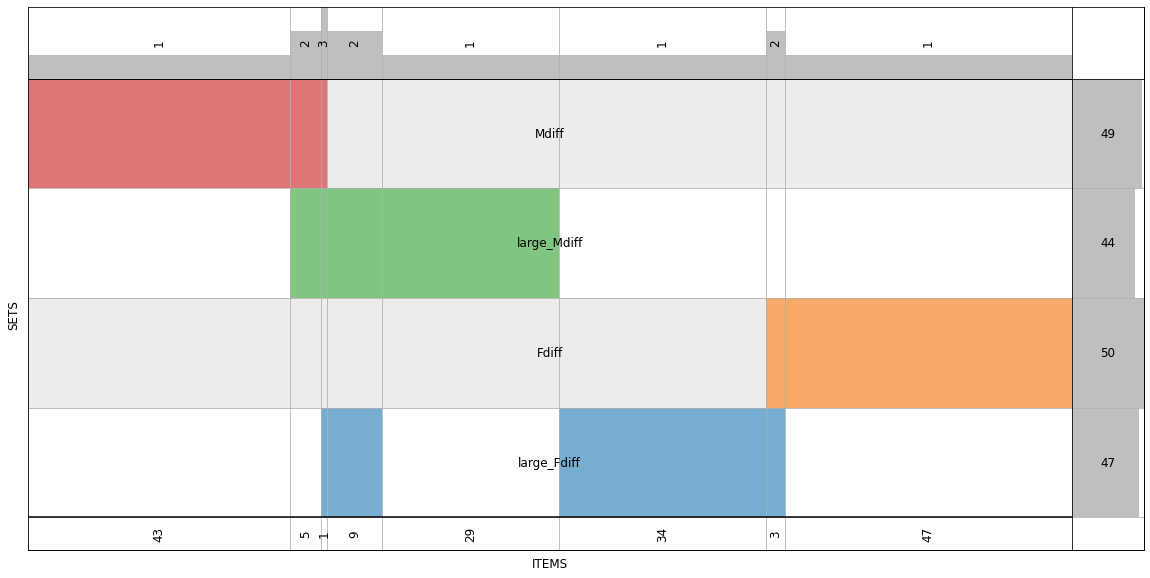

In [43]:
plt.figure(figsize=(20, 10))
species_names=['large_Fdiff','Fdiff','large_Mdiff','Mdiff']

supervenn(jeff2, species_names, rotate_col_annotations=True)#,
          # col_annotations_area_height=1.2, sets_ordering='minimize gaps',
          # min_width_for_annotation=180)

25